# importation des donnees

In [1]:
!sudo apt-get update
!sudo apt-get install -y curl apt-transport-https
!curl https://packages.microsoft.com/keys/microsoft.asc | sudo apt-key add -
!curl https://packages.microsoft.com/config/ubuntu/20.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
!sudo apt-get update
!sudo ACCEPT_EULA=Y apt-get install -y msodbcsql18 unixodbc-dev

'sudo' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
'sudo' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!sudo ACCEPT_EULA=Y apt-get install -y msodbcsql18

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!odbcinst -q -d

'odbcinst' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import pandas as pd
import numpy as np
import datetime
import json
import pyodbc

In [5]:
data1 = pd.read_csv('source1\postings.csv')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\3222178143.py:1: SyntaxWarning: invalid escape sequence '\p'
  data1 = pd.read_csv('source1\postings.csv')


In [6]:
skills = pd.read_csv('source1\mappings\skills.csv')
industries = pd.read_csv('source1\mappings\industries.csv')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\2425499114.py:1: SyntaxWarning: invalid escape sequence '\m'
  skills = pd.read_csv('source1\mappings\skills.csv')
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\2425499114.py:2: SyntaxWarning: invalid escape sequence '\m'
  industries = pd.read_csv('source1\mappings\industries.csv')


In [7]:
salaries = pd.read_csv('source1\jobs\salaries.csv')
job_skills = pd.read_csv('source1\jobs\job_skills.csv')
job_industries = pd.read_csv('source1\jobs\job_industries.csv')
benefits= pd.read_csv('source1\jobs\sbenefits.csv')

<>:1: SyntaxWarning: invalid escape sequence '\j'
<>:2: SyntaxWarning: invalid escape sequence '\j'
<>:3: SyntaxWarning: invalid escape sequence '\j'
<>:4: SyntaxWarning: invalid escape sequence '\j'
<>:1: SyntaxWarning: invalid escape sequence '\j'
<>:2: SyntaxWarning: invalid escape sequence '\j'
<>:3: SyntaxWarning: invalid escape sequence '\j'
<>:4: SyntaxWarning: invalid escape sequence '\j'
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\3943186957.py:1: SyntaxWarning: invalid escape sequence '\j'
  salaries = pd.read_csv('source1\jobs\salaries.csv')
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\3943186957.py:2: SyntaxWarning: invalid escape sequence '\j'
  job_skills = pd.read_csv('source1\jobs\job_skills.csv')
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\3943186957.py:3: SyntaxWarning: invalid escape sequence '\j'
  job_industries = pd.read_csv('source1\jobs\job_industries.csv')
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\3943186957.py:4: SyntaxWarning: invalid escape sequ

In [8]:
companies = pd.read_csv('source1\companies\companies.csv')
company_industries = pd.read_csv('source1\companies\company_industries.csv')
company_specialities = pd.read_csv('source1\companies\company_specialities.csv')
employees_counts = pd.read_csv('source1\companies\employee_counts.csv')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\918300841.py:1: SyntaxWarning: invalid escape sequence '\c'
  companies = pd.read_csv('source1\companies\companies.csv')
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\918300841.py:2: SyntaxWarning: invalid escape sequence '\c'
  company_industries = pd.read_csv('source1\companies\company_industries.csv')
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\918300841.py:3: SyntaxWarning: invalid escape sequence '\c'
  company_specialities = pd.read_csv('source1\companies\company_specialities.csv')
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\918300841

# comprendre les donnees

In [9]:
print(data1.info())
print(skills.info())
print(industries.info())
print(salaries.info())
print(job_skills.info())
print(job_industries.info())
print(benefits.info())
print(companies.info())
print(company_industries.info())
print(company_specialities.info())
print(employees_counts.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

In [10]:
print(data1.describe())

             job_id    max_salary    company_id          views     med_salary  \
count  1.238490e+05  2.979300e+04  1.221320e+05  122160.000000    6280.000000   
mean   3.896402e+09  9.193942e+04  1.220401e+07      14.618247   22015.619876   
std    8.404355e+07  7.011101e+05  2.554143e+07      85.903598   52255.873846   
min    9.217160e+05  1.000000e+00  1.009000e+03       1.000000       0.000000   
25%    3.894587e+09  4.828000e+01  1.435200e+04       3.000000      18.940000   
50%    3.901998e+09  8.000000e+04  2.269650e+05       4.000000      25.500000   
75%    3.904707e+09  1.400000e+05  8.047188e+06       8.000000    2510.500000   
max    3.906267e+09  1.200000e+08  1.034730e+08    9975.000000  750000.000000   

         min_salary       applies  original_listed_time  remote_allowed  \
count  2.979300e+04  23320.000000          1.238490e+05         15246.0   
mean   6.491085e+04     10.591981          1.713152e+12             1.0   
std    4.959738e+05     29.047395          4.

In [11]:
data1.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [12]:
data1.shape

(123849, 31)

# netoyage de source 1

In [13]:
print('netoyage data1')
print('supprimer les lignes qui contient des champs vide pour le nom de compagne ')
data1_cleaned = data1.dropna(subset=['company_name'])
print('supprimer les colonnes qui ne sont pas nessaire')
data1_cleaned.drop(columns=['description','med_salary','fips','zip_code','sponsored','posting_domain','job_posting_url','application_url','formatted_work_type','original_listed_time','closed_time','skills_desc','compensation_type'], inplace=True)
print('remplir les champs vide par des valeur entre min et max et valeur plus proche au mean et plus logique')
# Remplir les valeurs nulles
# 1. Pour la colonne 'remote_allowed', remplir les champs vides par 0
data1_cleaned['remote_allowed'] = data1_cleaned['remote_allowed'].fillna(0)

# 2. Pour 'pay_period', remplir tout par "YEARLY"
data1_cleaned['pay_period'] = data1_cleaned['pay_period'].fillna('YEARLY')

# Créer un masque pour les valeurs nulles
mask = data1_cleaned['normalized_salary'].isnull()

# Remplacer les valeurs nulles par des salaires aléatoires
data1_cleaned.loc[mask, 'normalized_salary'] = np.random.uniform(1e5, 9e7, size=mask.sum())

# 4. Pour 'currency', remplir tout par "USD"
data1_cleaned['currency'] = data1_cleaned['currency'].fillna('USD')

# Créer un masque pour les valeurs manquantes
mask = data1_cleaned['formatted_experience_level'].isnull()

# Remplacer les valeurs nulles par des choix aléatoires
data1_cleaned.loc[mask, 'formatted_experience_level'] = np.random.choice(
    ['Entry level', 'Mid-Senior level'], size=mask.sum()
)


# Créer un masque pour les valeurs manquantes dans 'applies'
mask_applies = data1_cleaned['applies'].isnull()

# Remplir les valeurs manquantes avec des nombres aléatoires entre 1 et 800
data1_cleaned.loc[mask_applies, 'applies'] = np.random.randint(1, 801, size=mask_applies.sum())

# Créer un masque pour les valeurs manquantes dans 'views'
mask_views = data1_cleaned['views'].isnull()

# Remplir les valeurs manquantes avec des nombres aléatoires entre 1 et 9999
data1_cleaned.loc[mask_views, 'views'] = np.random.randint(1, 10000, size=mask_views.sum())

def fill_random_salaries(df, pay_period):
    # Filtrer les lignes où pay_period est égal à la valeur spécifiée
    filtered_data = df[df['pay_period'] == pay_period]

    # Calculer les valeurs minimales et maximales pour min_salary et max_salary
    min_salary_min = filtered_data['min_salary'].min()
    min_salary_max = filtered_data['min_salary'].max()
    max_salary_min = filtered_data['max_salary'].min()
    max_salary_max = filtered_data['max_salary'].max()

    # Remplir les valeurs nulles pour min_salary et max_salary avec des valeurs aléatoires
    df.loc[df['pay_period'] == pay_period, 'min_salary'] = df.loc[df['pay_period'] == pay_period, 'min_salary'].apply(
        lambda x: np.random.uniform(min_salary_min, min_salary_max) if pd.isnull(x) else x
    )

    df.loc[df['pay_period'] == pay_period, 'max_salary'] = df.loc[df['pay_period'] == pay_period, 'max_salary'].apply(
        lambda x: np.random.uniform(max_salary_min, max_salary_max) if pd.isnull(x) else x
    )

# Appliquer la fonction pour les trois conditions
fill_random_salaries(data1_cleaned, 'YEARLY')
fill_random_salaries(data1_cleaned, 'MONTHLY')
fill_random_salaries(data1_cleaned, 'HOURLY')

#changement de type

data1_cleaned['company_name'] = data1_cleaned['company_name'].astype('string')
data1_cleaned['title'] = data1_cleaned['title'].astype('string')
data1_cleaned['pay_period'] = data1_cleaned['pay_period'].astype('string')
data1_cleaned['location'] = data1_cleaned['location'].astype('string')
data1_cleaned['views'] = data1_cleaned['views'].astype('int')
data1_cleaned['applies'] = data1_cleaned['applies'].astype('int')
data1_cleaned['remote_allowed '] = data1_cleaned['remote_allowed'].astype('int')
data1_cleaned['application_type'] = data1_cleaned['application_type'].astype('string')
data1_cleaned['formatted_experience_level'] = data1_cleaned['formatted_experience_level'].astype('string')
data1_cleaned['work_type'] = data1_cleaned['work_type'].astype('string')
data1_cleaned['currency'] = data1_cleaned['currency'].astype('string')

data1_cleaned = data1_cleaned.rename(columns={'listed_time': 'date'})

# Convertir les valeurs de la colonne 'date' en format de date lisible
data1_cleaned['date'] = pd.to_datetime(data1_cleaned['date'], unit='ms')

print(data1_cleaned.isnull().sum())


netoyage data1
supprimer les lignes qui contient des champs vide pour le nom de compagne 
supprimer les colonnes qui ne sont pas nessaire
remplir les champs vide par des valeur entre min et max et valeur plus proche au mean et plus logique


C:\Users\pc\AppData\Local\Temp\ipykernel_22036\878870625.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_cleaned.drop(columns=['description','med_salary','fips','zip_code','sponsored','posting_domain','job_posting_url','application_url','formatted_work_type','original_listed_time','closed_time','skills_desc','compensation_type'], inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\878870625.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_cleaned['remote_allowed'] = data1_cleaned['remote_allowed'].fillna(0)
C:\Users\pc\AppData\Local\Te

job_id                        0
company_name                  0
title                         0
max_salary                    0
pay_period                    0
location                      0
company_id                    0
views                         0
min_salary                    0
applies                       0
remote_allowed                0
application_type              0
expiry                        0
formatted_experience_level    0
date                          0
work_type                     0
currency                      0
normalized_salary             0
remote_allowed                0
dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_22036\878870625.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_cleaned['company_name'] = data1_cleaned['company_name'].astype('string')
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\878870625.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_cleaned['title'] = data1_cleaned['title'].astype('string')
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\878870625.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [14]:
employees_counts.drop(columns=['time_recorded'], inplace=True)
print(employees_counts.isnull().sum())
print(employees_counts.info())

company_id        0
employee_count    0
follower_count    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35787 entries, 0 to 35786
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   company_id      35787 non-null  int64
 1   employee_count  35787 non-null  int64
 2   follower_count  35787 non-null  int64
dtypes: int64(3)
memory usage: 838.9 KB
None


In [15]:
company_specialities['speciality'] = company_specialities['speciality'].astype('string')
print(company_specialities.isnull().sum())
print(company_specialities.info())

company_id    0
speciality    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169387 entries, 0 to 169386
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   company_id  169387 non-null  int64 
 1   speciality  169387 non-null  string
dtypes: int64(1), string(1)
memory usage: 2.6 MB
None


In [16]:
company_industries['industry'] = company_industries['industry'].astype('string')
print(company_industries.isnull().sum())
print(company_industries.info())

company_id    0
industry      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24375 entries, 0 to 24374
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company_id  24375 non-null  int64 
 1   industry    24375 non-null  string
dtypes: int64(1), string(1)
memory usage: 381.0 KB
None


In [17]:
print(companies.isnull().sum())
print(companies.info())

company_id         0
name               1
description      297
company_size    2774
state             22
country            0
city               1
zip_code          28
address           22
url                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24473 entries, 0 to 24472
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    24473 non-null  int64  
 1   name          24472 non-null  object 
 2   description   24176 non-null  object 
 3   company_size  21699 non-null  float64
 4   state         24451 non-null  object 
 5   country       24473 non-null  object 
 6   city          24472 non-null  object 
 7   zip_code      24445 non-null  object 
 8   address       24451 non-null  object 
 9   url           24473 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.9+ MB
None


In [18]:
# Supprimer les colonnes 'url', 'address', 'zip_code'
companies = companies.drop(columns=['url', 'address', 'zip_code','description'])

# Remplir les valeurs vides dans les colonnes 'state' et 'city' par 'unknown'
companies['state'] = companies['state'].fillna('unknown')
companies['city'] = companies['city'].fillna('unknown')
companies['name'] = companies['name'].fillna('unknown')

companies['company_size'] = companies['company_size'].fillna(companies['company_size'].mean()).astype(int)

companies['city'] = companies['city'].astype('string')
companies['country'] = companies['country'].astype('string')
companies['state'] = companies['state'].astype('string')
companies['name'] = companies['name'].astype('string')

In [19]:
print(companies.isnull().sum())
print(companies.info())

company_id      0
name            0
company_size    0
state           0
country         0
city            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24473 entries, 0 to 24472
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    24473 non-null  int64 
 1   name          24473 non-null  string
 2   company_size  24473 non-null  int64 
 3   state         24473 non-null  string
 4   country       24473 non-null  string
 5   city          24473 non-null  string
dtypes: int64(2), string(4)
memory usage: 1.1 MB
None


In [20]:
print(benefits.isnull().sum())
print(benefits.info())
benefits['type'] = benefits['type'].astype('string')

job_id      0
inferred    0
type        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67943 entries, 0 to 67942
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   job_id    67943 non-null  int64 
 1   inferred  67943 non-null  int64 
 2   type      67943 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.6+ MB
None


In [21]:
print(job_industries.isnull().sum())
print(job_industries.info())

job_id         0
industry_id    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164808 entries, 0 to 164807
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   job_id       164808 non-null  int64
 1   industry_id  164808 non-null  int64
dtypes: int64(2)
memory usage: 2.5 MB
None


In [22]:
print(job_skills.isnull().sum())
print(job_skills.info())

job_id       0
skill_abr    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213768 entries, 0 to 213767
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   job_id     213768 non-null  int64 
 1   skill_abr  213768 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.3+ MB
None


In [23]:
salaries['pay_period'].unique()

array(['HOURLY', 'YEARLY', 'MONTHLY', 'WEEKLY', 'BIWEEKLY'], dtype=object)

In [24]:
print(salaries.isnull().sum())
print(salaries.info())

salary_id                0
job_id                   0
max_salary            6838
med_salary           33947
min_salary            6838
pay_period               0
currency                 0
compensation_type        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40785 entries, 0 to 40784
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   salary_id          40785 non-null  int64  
 1   job_id             40785 non-null  int64  
 2   max_salary         33947 non-null  float64
 3   med_salary         6838 non-null   float64
 4   min_salary         33947 non-null  float64
 5   pay_period         40785 non-null  object 
 6   currency           40785 non-null  object 
 7   compensation_type  40785 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 2.5+ MB
None


In [25]:
# Définir les min et max de salaire pour chaque pay_period
salary_ranges = {
    'HOURLY': (15, 100),  # Exemple : de 15 à 100 pour l'heure
    'YEARLY': (30000, 150000),  # Exemple : de 30k à 150k par an
    'MONTHLY': (2500, 12500),  # Exemple : de 2500 à 12500 par mois
    'WEEKLY': (500, 2500),  # Exemple : de 500 à 2500 par semaine
    'BIWEEKLY': (1000, 5000)  # Exemple : de 1000 à 5000 toutes les deux semaines
}

# Remplir les valeurs manquantes de max_salary et min_salary par des valeurs aléatoires
def fill_salaries(row):
    pay_period = row['pay_period']
    min_salary, max_salary = salary_ranges.get(pay_period, (0, 0))  # Valeur par défaut (0, 0) si pay_period est inconnu

    # Générer des salaires aléatoires entre min et max
    if pd.isna(row['max_salary']):
        row['max_salary'] = np.random.randint(min_salary, max_salary)
    if pd.isna(row['min_salary']):
        row['min_salary'] = np.random.randint(min_salary, max_salary)

    return row

# Appliquer la fonction à chaque ligne du DataFrame
salaries = salaries.apply(fill_salaries, axis=1)

# Calculate the average of min_salary and max_salary
salaries['med_salary'] = salaries.apply(
    lambda row: (row['min_salary'] + row['max_salary']) / 2
    if pd.isnull(row['med_salary'])
    else row['med_salary'],
    axis=1
)
salaries['pay_period'] = salaries['pay_period'].astype('string')
salaries['currency'] = salaries['currency'].astype('string')


In [26]:
print(salaries.isnull().sum())
print(salaries.info())

salary_id            0
job_id               0
max_salary           0
med_salary           0
min_salary           0
pay_period           0
currency             0
compensation_type    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40785 entries, 0 to 40784
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   salary_id          40785 non-null  int64  
 1   job_id             40785 non-null  int64  
 2   max_salary         40785 non-null  float64
 3   med_salary         40785 non-null  float64
 4   min_salary         40785 non-null  float64
 5   pay_period         40785 non-null  string 
 6   currency           40785 non-null  string 
 7   compensation_type  40785 non-null  object 
dtypes: float64(3), int64(2), object(1), string(2)
memory usage: 2.5+ MB
None


In [27]:
print(industries.isnull().sum())
print(industries.info())

industry_id       0
industry_name    34
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   industry_id    422 non-null    int64 
 1   industry_name  388 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.7+ KB
None


In [28]:
print(skills.isnull().sum())
print(salaries.info())

skill_abr     0
skill_name    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40785 entries, 0 to 40784
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   salary_id          40785 non-null  int64  
 1   job_id             40785 non-null  int64  
 2   max_salary         40785 non-null  float64
 3   med_salary         40785 non-null  float64
 4   min_salary         40785 non-null  float64
 5   pay_period         40785 non-null  string 
 6   currency           40785 non-null  string 
 7   compensation_type  40785 non-null  object 
dtypes: float64(3), int64(2), object(1), string(2)
memory usage: 2.5+ MB
None


In [29]:
print(data1_cleaned.columns)
print(skills.columns)
print(industries.columns)
print(salaries.columns)
print(job_skills.columns)
print(job_industries.columns)
print(benefits.columns)
print(companies.columns)
print(company_industries.columns)
print(company_specialities.columns)
print(employees_counts.columns)


Index(['job_id', 'company_name', 'title', 'max_salary', 'pay_period',
       'location', 'company_id', 'views', 'min_salary', 'applies',
       'remote_allowed', 'application_type', 'expiry',
       'formatted_experience_level', 'date', 'work_type', 'currency',
       'normalized_salary', 'remote_allowed '],
      dtype='object')
Index(['skill_abr', 'skill_name'], dtype='object')
Index(['industry_id', 'industry_name'], dtype='object')
Index(['salary_id', 'job_id', 'max_salary', 'med_salary', 'min_salary',
       'pay_period', 'currency', 'compensation_type'],
      dtype='object')
Index(['job_id', 'skill_abr'], dtype='object')
Index(['job_id', 'industry_id'], dtype='object')
Index(['job_id', 'inferred', 'type'], dtype='object')
Index(['company_id', 'name', 'company_size', 'state', 'country', 'city'], dtype='object')
Index(['company_id', 'industry'], dtype='object')
Index(['company_id', 'speciality'], dtype='object')
Index(['company_id', 'employee_count', 'follower_count'], dtype='objec

In [30]:
data1_cleaned['date'] = pd.to_datetime(data1_cleaned['date'])
data1_cleaned['jour'] = data1_cleaned['date'].dt.day
data1_cleaned['mois'] = data1_cleaned['date'].dt.month
data1_cleaned['annes'] = data1_cleaned['date'].dt.year

In [31]:
data1_cleaned[['city', 'state']] = data1_cleaned['location'].str.extract(r'([^,]+)(?:,\s*(\w+))?')

# Remplacement des valeurs manquantes de state par 'Unknown'
data1_cleaned['state'] = data1_cleaned['state'].fillna('Unknown')

In [32]:
# Chargement de la base de données des villes et des pays
cities_df = pd.read_csv('worldcities.csv')

# Mappage des villes aux pays
city_to_country = cities_df.set_index('city')['country'].to_dict()

# Ajout de la colonne country
data1_cleaned['country'] = data1_cleaned['city'].map(city_to_country).fillna('Unknown')
data1_cleaned.loc[data1_cleaned['country'] == 'Unknown', 'country'] = data1_cleaned['city']

In [33]:
print(data1_cleaned.isnull().sum())
print(data1_cleaned.info())

job_id                        0
company_name                  0
title                         0
max_salary                    0
pay_period                    0
location                      0
company_id                    0
views                         0
min_salary                    0
applies                       0
remote_allowed                0
application_type              0
expiry                        0
formatted_experience_level    0
date                          0
work_type                     0
currency                      0
normalized_salary             0
remote_allowed                0
jour                          0
mois                          0
annes                         0
city                          0
state                         0
country                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 122130 entries, 0 to 123848
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------     

In [34]:
print(data1_cleaned[['country', 'state', 'city']].head(200))

            country    state            city
0     United States       NJ       Princeton
2     United States       OH      Cincinnati
3     United States       NY   New Hyde Park
5     United States       NC         Raleigh
6     United States  Unknown   United States
..              ...      ...             ...
229   United States       TX          Dallas
230  North Carolina   United  North Carolina
231          Canada       OH          Sidney
232   United States       GA         Decatur
233     Philippines       MA          Boston

[200 rows x 3 columns]


In [35]:
skills['skill_abr'] = skills['skill_abr'].astype('string')
skills['skill_name'] = skills['skill_name'].astype('string')
data1_cleaned['country'] = data1_cleaned['country'].astype('string')
industries['industry_name'] = industries['industry_name'].astype('string')
job_skills['skill_abr'] = job_skills['skill_abr'].astype('string')

In [36]:
print(data1_cleaned.info())
print(skills.info())
print(industries.info())
print(salaries.info())
print(job_skills.info())
print(data1_cleaned.info())
print(benefits.info())
print(companies.info())
print(company_industries.info())
print(company_specialities.info())
print(employees_counts.info())



print(data1_cleaned.columns)
print(skills.columns)
print(industries.columns)
print(salaries.columns)
print(job_skills.columns)
print(job_industries.columns)
print(benefits.columns)
print(companies.columns)
print(company_industries.columns)
print(company_specialities.columns)
print(employees_counts.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 122130 entries, 0 to 123848
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   job_id                      122130 non-null  int64         
 1   company_name                122130 non-null  string        
 2   title                       122130 non-null  string        
 3   max_salary                  122130 non-null  float64       
 4   pay_period                  122130 non-null  string        
 5   location                    122130 non-null  string        
 6   company_id                  122130 non-null  float64       
 7   views                       122130 non-null  int64         
 8   min_salary                  122130 non-null  float64       
 9   applies                     122130 non-null  int64         
 10  remote_allowed              122130 non-null  float64       
 11  application_type            122130 non-null 

In [37]:
job_skills.head()

,job_id,skill_abr
0,3884428798,MRKT
1,3884428798,PR
2,3884428798,WRT
3,3887473071,SALE
4,3887465684,FIN


In [38]:
print(data1_cleaned['job_id'].nunique() == len(data1_cleaned))
print(companies['company_id'].nunique() == len(companies))

True
True


In [39]:
print(data1_cleaned.columns)

Index(['job_id', 'company_name', 'title', 'max_salary', 'pay_period',
       'location', 'company_id', 'views', 'min_salary', 'applies',
       'remote_allowed', 'application_type', 'expiry',
       'formatted_experience_level', 'date', 'work_type', 'currency',
       'normalized_salary', 'remote_allowed ', 'jour', 'mois', 'annes', 'city',
       'state', 'country'],
      dtype='object')


In [40]:
# Étape 1: Fusionner job_skills avec skills pour obtenir les noms des compétences
job_skills_with_names = pd.merge(job_skills, skills, on='skill_abr', how='left')

# Étape 2: Fusionner le résultat avec data1_cleaned pour ajouter la colonne skill_name
data1_cleaned = pd.merge(data1_cleaned, job_skills_with_names, on='job_id', how='left')


In [41]:
# Étape 1: Fusionner job_skills avec skills pour obtenir les noms des compétences
job_skills_with_names = pd.merge(job_skills, skills, on='skill_abr', how='left')

# Étape 2: Fusionner le résultat avec data1_cleaned pour ajouter la colonne skill_name
data1_cleaned = pd.merge(data1_cleaned, job_skills_with_names, on='job_id', how='left')

In [42]:

data1_cleaned = data1_cleaned.groupby('job_id').agg({
    'company_name': 'first',
    'title': 'first',
    'max_salary': 'first',
    'pay_period': 'first',
    'location': 'first',
    'company_id': 'first',
    'views': 'first',
    'min_salary': 'first',
    'applies': 'first',
    'remote_allowed': 'first',
    'application_type': 'first',
    'expiry': 'first',
    'formatted_experience_level': 'first',
    'date': 'first',
    'work_type': 'first',
    'currency': 'first',
    'normalized_salary': 'first',
    'remote_allowed ': 'first',
    'jour': 'first',
    'mois': 'first',
    'annes': 'first',
    'city': 'first',
    'state': 'first',
    'country': 'first',
    'skill_name_y': lambda x: ', '.join(x.dropna())  # Concaténer les skill_name en une seule chaîne
}).reset_index()
# Afficher les colonnes du DataFrame résultant pour vérifier
print(data1_cleaned.columns)

Index(['job_id', 'company_name', 'title', 'max_salary', 'pay_period',
       'location', 'company_id', 'views', 'min_salary', 'applies',
       'remote_allowed', 'application_type', 'expiry',
       'formatted_experience_level', 'date', 'work_type', 'currency',
       'normalized_salary', 'remote_allowed ', 'jour', 'mois', 'annes', 'city',
       'state', 'country', 'skill_name_y'],
      dtype='object')


In [43]:
# Afficher les colonnes du DataFrame résultant pour vérifier
print(data1_cleaned.columns)

Index(['job_id', 'company_name', 'title', 'max_salary', 'pay_period',
       'location', 'company_id', 'views', 'min_salary', 'applies',
       'remote_allowed', 'application_type', 'expiry',
       'formatted_experience_level', 'date', 'work_type', 'currency',
       'normalized_salary', 'remote_allowed ', 'jour', 'mois', 'annes', 'city',
       'state', 'country', 'skill_name_y'],
      dtype='object')


In [44]:
data1_cleaned = data1_cleaned.drop(columns=['location','application_type','expiry','remote_allowed'])

In [45]:
data1_cleaned[['job_id','skill_name_y']].head(100)

,job_id,skill_name_y
0,921716,"Marketing, Sales, Marketing, Sales"
1,1218575,Health Care Provider
2,2264355,"Design, Art/Creative, Information Technology, ..."
3,9615617,
4,10998357,"Management, Manufacturing, Management, Manufac..."
...,...,...
95,3270034794,"Project Management, Information Technology, Pr..."
96,3273249702,"Accounting/Auditing, Finance, Accounting/Audit..."
97,3277232283,Human Resources
98,3297645846,"Management, Manufacturing, Management, Manufac..."


In [46]:
company_specialities = company_specialities.groupby('company_id').agg({
    'speciality': lambda x: ', '.join(x)
}).reset_index()

In [47]:
company_industries = company_industries.groupby('company_id').agg({
    'industry': lambda x: ', '.join(x)
}).reset_index()

In [48]:
employees_counts = employees_counts.drop_duplicates()
def aggregate_rows(group):
    if group['employee_count'].nunique() == 1:
        # Employee count identique : somme des follower_count
        return pd.Series({
            'employee_count': group['employee_count'].iloc[0],
            'follower_count': group['follower_count'].sum()
        })
    else:
        # Employee count différent : somme des employee_count
        return pd.Series({
            'employee_count': group['employee_count'].sum(),
            'follower_count': group['follower_count'].iloc[0]  # Prendre un follower_count arbitrairement
        })

# Appliquer la logique par groupe
employees_counts = employees_counts.groupby('company_id').apply(aggregate_rows).reset_index()

C:\Users\pc\AppData\Local\Temp\ipykernel_22036\2225875505.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  employees_counts = employees_counts.groupby('company_id').apply(aggregate_rows).reset_index()


In [49]:
print(data1_cleaned.columns)
print(skills.columns)
print(industries.columns)
print(salaries.columns)
print(job_skills.columns)
print(job_industries.columns)
print(benefits.columns)
print(companies.columns)
print(company_industries.columns)
print(company_specialities.columns)
print(employees_counts.columns)

Index(['job_id', 'company_name', 'title', 'max_salary', 'pay_period',
       'company_id', 'views', 'min_salary', 'applies',
       'formatted_experience_level', 'date', 'work_type', 'currency',
       'normalized_salary', 'remote_allowed ', 'jour', 'mois', 'annes', 'city',
       'state', 'country', 'skill_name_y'],
      dtype='object')
Index(['skill_abr', 'skill_name'], dtype='object')
Index(['industry_id', 'industry_name'], dtype='object')
Index(['salary_id', 'job_id', 'max_salary', 'med_salary', 'min_salary',
       'pay_period', 'currency', 'compensation_type'],
      dtype='object')
Index(['job_id', 'skill_abr'], dtype='object')
Index(['job_id', 'industry_id'], dtype='object')
Index(['job_id', 'inferred', 'type'], dtype='object')
Index(['company_id', 'name', 'company_size', 'state', 'country', 'city'], dtype='object')
Index(['company_id', 'industry'], dtype='object')
Index(['company_id', 'speciality'], dtype='object')
Index(['company_id', 'employee_count', 'follower_count'], dty

In [50]:
industries['industry_name'].fillna('unknown', inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_22036\2686543406.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  industries['industry_name'].fillna('unknown', inplace=True)


In [51]:
missing_columns = data1_cleaned.columns[data1_cleaned.isnull().any()].tolist()
print("Colonnes avec des valeurs manquantes dans company:", missing_columns)

Colonnes avec des valeurs manquantes dans company: []


# Agrégation Fusion des données pour source 1

In [52]:
# Fusionner `data1_cleaned` avec `companies`
data1_enriched = data1_cleaned.merge(companies, on='company_id', how='left')

# Fusionner avec `company_industries`
data1_enriched = data1_enriched.merge(company_industries, on='company_id', how='left')

# Fusionner avec `company_specialities` (après traitement des doublons)
data1_enriched = data1_enriched.merge(company_specialities, on='company_id', how='left')

# Fusionner avec `employees_counts`
data1_enriched = data1_enriched.merge(employees_counts, on='company_id', how='left')

In [53]:
# Vérification des colonnes finales
print(data1_enriched.columns)

Index(['job_id', 'company_name', 'title', 'max_salary', 'pay_period',
       'company_id', 'views', 'min_salary', 'applies',
       'formatted_experience_level', 'date', 'work_type', 'currency',
       'normalized_salary', 'remote_allowed ', 'jour', 'mois', 'annes',
       'city_x', 'state_x', 'country_x', 'skill_name_y', 'name',
       'company_size', 'state_y', 'country_y', 'city_y', 'industry',
       'speciality', 'employee_count', 'follower_count'],
      dtype='object')


In [54]:
data1_enriched.rename(columns={
    'state_y': 'state_compagie',
    'country_y': 'country_compagie',
    'city_y': 'city_compagie',
    'state_x': 'state_job',
    'country_x': 'country_job',
    'city_x': 'city_job',
    'skill_name_y' : 'skill'
}, inplace=True)

In [55]:
data1_enriched = data1_enriched.drop(columns=['name'])

In [56]:
# Vérifier l'unicité directement
est_unique = benefits['job_id'].is_unique

if est_unique:
    print("Toutes les valeurs dans la colonne 'id' sont uniques.")
else:
    print("La colonne 'id' contient des doublons.")

La colonne 'id' contient des doublons.


In [57]:
benefits = benefits.groupby('job_id').agg({
    'type': lambda x: ', '.join(x)
}).reset_index()

In [58]:
# Fusionner les deux DataFrames sur la colonne 'job_id'
data1_enriched = data1_enriched.merge(
    benefits[['job_id', 'type']],  # On sélectionne uniquement les colonnes nécessaires
    on='job_id',                  # Fusion sur 'job_id'
    how='left'                    # Fusion de type gauche pour conserver toutes les lignes de data1_enriched
)


In [59]:
# Vérifier l'unicité directement
est_unique = data1_enriched['job_id'].is_unique

if est_unique:
    print("Toutes les valeurs dans la colonne 'id' sont uniques.")
else:
    print("La colonne 'id' contient des doublons.")

Toutes les valeurs dans la colonne 'id' sont uniques.


In [60]:
print(data1_enriched.columns)

Index(['job_id', 'company_name', 'title', 'max_salary', 'pay_period',
       'company_id', 'views', 'min_salary', 'applies',
       'formatted_experience_level', 'date', 'work_type', 'currency',
       'normalized_salary', 'remote_allowed ', 'jour', 'mois', 'annes',
       'city_job', 'state_job', 'country_job', 'skill', 'company_size',
       'state_compagie', 'country_compagie', 'city_compagie', 'industry',
       'speciality', 'employee_count', 'follower_count', 'type'],
      dtype='object')


In [61]:
data1_enriched.columns = data1_enriched.columns.str.strip()

In [62]:
# 1. Créer la table location
location = data1_enriched[['city_job', 'state_job', 'country_job']].drop_duplicates().reset_index(drop=True)
location['id_location'] = location.index + 1

# 2. Créer la table time
temps = data1_enriched[['jour', 'mois', 'annes', 'date']].drop_duplicates().reset_index(drop=True)
temps['id_time'] = temps.index + 1

# 3. Créer la table type_job
type_job = data1_enriched[['title', 'max_salary', 'min_salary', 'pay_period', 'currency',
                 'formatted_experience_level', 'work_type', 'skill']].drop_duplicates().reset_index(drop=True)
type_job['id_type_job'] = type_job.index + 1

# 4. Créer la table benefits
benefits = data1_enriched[['type', 'remote_allowed']].drop_duplicates().reset_index(drop=True)
benefits['id_benefits'] = benefits.index + 1

# 5. Créer la table company
company = data1_enriched[['company_name', 'company_size', 'employee_count', 'follower_count',
                'speciality', 'industry', 'state_compagie', 'country_compagie', 'city_compagie']].drop_duplicates().reset_index(drop=True)
company['company_id'] = company.index + 1

# 6. Ajouter les IDs correspondants à la table job_posting
job_posting = data1_enriched[['job_id', 'normalized_salary', 'applies', 'views',
                              'city_job', 'state_job', 'country_job',
                              'jour', 'mois', 'annes', 'date',
                              'title', 'max_salary', 'min_salary', 'pay_period',
                              'currency', 'formatted_experience_level', 'work_type', 'skill',
                              'type', 'remote_allowed',
                              'company_name', 'company_size', 'employee_count',
                              'follower_count', 'speciality', 'industry',
                              'state_compagie', 'country_compagie', 'city_compagie']].copy()

# Ajouter les clés étrangères
job_posting = job_posting.merge(location, on=['city_job', 'state_job', 'country_job'], how='left')

job_posting = job_posting.merge(temps, on=['jour', 'mois', 'annes', 'date'], how='left')
job_posting = job_posting.merge(type_job, on=['title', 'max_salary', 'min_salary', 'pay_period',
                                              'currency', 'formatted_experience_level', 'work_type', 'skill'], how='left')
job_posting = job_posting.merge(benefits, on=['type', 'remote_allowed'], how='left')
job_posting = job_posting.merge(company, on=['company_name', 'company_size', 'employee_count',
                                             'follower_count', 'speciality', 'industry',
                                             'state_compagie', 'country_compagie', 'city_compagie'], how='left')

# Renommer les colonnes et réorganiser
job_posting.rename(columns={
    'job_id': 'id_job_posting'
}, inplace=True)

In [63]:
print(job_posting.columns)
print(location.columns)
print(temps.columns)
print(type_job.columns)
print(benefits.columns)
print(company.columns)

Index(['id_job_posting', 'normalized_salary', 'applies', 'views', 'city_job',
       'state_job', 'country_job', 'jour', 'mois', 'annes', 'date', 'title',
       'max_salary', 'min_salary', 'pay_period', 'currency',
       'formatted_experience_level', 'work_type', 'skill', 'type',
       'remote_allowed', 'company_name', 'company_size', 'employee_count',
       'follower_count', 'speciality', 'industry', 'state_compagie',
       'country_compagie', 'city_compagie', 'id_location', 'id_time',
       'id_type_job', 'id_benefits', 'company_id'],
      dtype='object')
Index(['city_job', 'state_job', 'country_job', 'id_location'], dtype='object')
Index(['jour', 'mois', 'annes', 'date', 'id_time'], dtype='object')
Index(['title', 'max_salary', 'min_salary', 'pay_period', 'currency',
       'formatted_experience_level', 'work_type', 'skill', 'id_type_job'],
      dtype='object')
Index(['type', 'remote_allowed', 'id_benefits'], dtype='object')
Index(['company_name', 'company_size', 'employee_c

In [64]:
colonnes_a_garder = [
    'id_job_posting', 'normalized_salary', 'applies', 'views',
    'id_location', 'id_time', 'id_type_job', 'id_benefits', 'company_id'
]
job_posting = job_posting[colonnes_a_garder]

In [65]:
missing_columns = job_posting.columns[job_posting.isnull().any()].tolist()
print("Colonnes avec des valeurs manquantes dans job_posting:", missing_columns)

Colonnes avec des valeurs manquantes dans job_posting: []


In [66]:

company['industry'].fillna('unknown', inplace=True)
company['speciality'].fillna('unknown', inplace=True)
benefits['type'].fillna('unknown', inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_22036\4034204705.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  company['industry'].fillna('unknown', inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\4034204705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [67]:
job_posting.shape

(122130, 9)

In [68]:
print(type_job['formatted_experience_level'].unique())

<StringArray>
['Mid-Senior level',      'Entry level',        'Associate',
         'Director',       'Internship',        'Executive']
Length: 6, dtype: string


In [69]:
print(job_posting.shape)
print(location.shape)
print(temps.shape)
print(type_job.shape)
print(benefits.shape)
print(company.shape)

(122130, 9)
(8457, 4)
(52021, 5)
(120320, 9)
(1302, 3)
(24472, 10)


In [70]:
print(job_posting.isnull().sum())
print(location.isnull().sum())
print(temps.isnull().sum())
print(type_job.isnull().sum())
print(benefits.isnull().sum())
print(company.isnull().sum())

id_job_posting       0
normalized_salary    0
applies              0
views                0
id_location          0
id_time              0
id_type_job          0
id_benefits          0
company_id           0
dtype: int64
city_job       0
state_job      0
country_job    0
id_location    0
dtype: int64
jour       0
mois       0
annes      0
date       0
id_time    0
dtype: int64
title                         0
max_salary                    0
min_salary                    0
pay_period                    0
currency                      0
formatted_experience_level    0
work_type                     0
skill                         0
id_type_job                   0
dtype: int64
type              0
remote_allowed    0
id_benefits       0
dtype: int64
company_name        0
company_size        0
employee_count      0
follower_count      0
speciality          0
industry            0
state_compagie      0
country_compagie    0
city_compagie       0
company_id          0
dtype: int64


In [71]:
print(job_posting.info())
print(location.info())
print(temps.info())
print(type_job.info())
print(benefits.info())
print(company.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122130 entries, 0 to 122129
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_job_posting     122130 non-null  int64  
 1   normalized_salary  122130 non-null  float64
 2   applies            122130 non-null  int64  
 3   views              122130 non-null  int64  
 4   id_location        122130 non-null  int64  
 5   id_time            122130 non-null  int64  
 6   id_type_job        122130 non-null  int64  
 7   id_benefits        122130 non-null  int64  
 8   company_id         122130 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 8.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8457 entries, 0 to 8456
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city_job     8457 non-null   string
 1   state_job    8457 non-null   string
 2   country_job  8457 non

# netoyage des donnees de source 3 json file

In [72]:
file_path = 'theirstack.json'
with open(file_path, 'r') as file:
    full_data = json.load(file)

In [73]:
data = full_data.get('data', [])
df = pd.DataFrame(data)

In [74]:
print(df.columns)

Index(['id', 'job_title', 'date_posted', 'company', 'location', 'state_code',
       'remote', 'hybrid', 'min_annual_salary', 'min_annual_salary_usd',
       'max_annual_salary', 'max_annual_salary_usd', 'avg_annual_salary_usd',
       'salary_currency', 'seniority', 'country_code', 'company_object', 'url',
       'has_blurred_data', 'final_url', 'source_url', 'short_location',
       'long_location', 'latitude', 'longitude', 'postal_code',
       'salary_string', 'countries', 'country', 'cities', 'continents',
       'country_codes', 'discovered_at', 'hiring_team', 'company_domain',
       'reposted', 'date_reposted', 'description', 'normalized_title',
       'manager_roles', 'matching_phrases', 'matching_words'],
      dtype='object')


In [75]:
colonnes_a_supprimer = ['url', 'has_blurred_data', 'final_url','source_url', 'long_location', 'short_location','latitude', 'longitude', 'postal_code','hybrid', 'countries', 'continents','country_codes','country_code','discovered_at','hiring_team','company_domain','reposted','date_reposted','description','normalized_title','manager_roles','matching_phrases','matching_words','cities']
df.drop(columns=colonnes_a_supprimer, inplace=True)

In [76]:
print(df.isnull().sum())

id                        0
job_title                 0
date_posted               0
company                   0
location                  0
state_code                2
remote                    0
min_annual_salary        68
min_annual_salary_usd    68
max_annual_salary        68
max_annual_salary_usd    68
avg_annual_salary_usd    66
salary_currency          66
seniority                 0
company_object            0
salary_string             1
country                  69
dtype: int64


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     150 non-null    int64  
 1   job_title              150 non-null    object 
 2   date_posted            150 non-null    object 
 3   company                150 non-null    object 
 4   location               150 non-null    object 
 5   state_code             148 non-null    object 
 6   remote                 150 non-null    bool   
 7   min_annual_salary      82 non-null     float64
 8   min_annual_salary_usd  82 non-null     float64
 9   max_annual_salary      82 non-null     float64
 10  max_annual_salary_usd  82 non-null     float64
 11  avg_annual_salary_usd  84 non-null     float64
 12  salary_currency        84 non-null     object 
 13  seniority              150 non-null    object 
 14  company_object         150 non-null    object 
 15  salary

In [78]:
# Remplir les champs numériques avec la moyenne
columns_to_fill_mean = [
    'min_annual_salary',
    'min_annual_salary_usd',
    'max_annual_salary',
    'max_annual_salary_usd',
    'avg_annual_salary_usd'
]

for column in columns_to_fill_mean:
    if column in df.columns:
        df[column].fillna(df[column].mean(), inplace=True)

# Remplir salary_currency avec 'USD'
if 'salary_currency' in df.columns:
    df['salary_currency'].fillna('USD', inplace=True)

# Remplir state_code avec 'unknown'
if 'state_code' in df.columns:
    df['state_code'].fillna('unknown', inplace=True)

# Remplir country avec 'United States'
if 'country' in df.columns:
    df['country'].fillna('United States', inplace=True)

# Vérifier les résultats
print(df.isnull().sum())

id                       0
job_title                0
date_posted              0
company                  0
location                 0
state_code               0
remote                   0
min_annual_salary        0
min_annual_salary_usd    0
max_annual_salary        0
max_annual_salary_usd    0
avg_annual_salary_usd    0
salary_currency          0
seniority                0
company_object           0
salary_string            1
country                  0
dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_22036\2398342205.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\2398342205.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [79]:
columns_to_string = [
    'job_title',
    'company',
    'location',
    'state_code',
    'salary_string',
    'salary_currency',
    'country',
    'cities',
    'seniority'
]
for column in columns_to_string:
    if column in df.columns:
        df[column] = df[column].astype('string')

# Conversion de la colonne 'remote' en int (False -> 0, True -> 1)
if 'remote' in df.columns:
    df['remote'] = df['remote'].astype(int)

In [80]:
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [81]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     150 non-null    int64         
 1   job_title              150 non-null    string        
 2   date_posted            150 non-null    datetime64[ns]
 3   company                150 non-null    string        
 4   location               150 non-null    string        
 5   state_code             150 non-null    string        
 6   remote                 150 non-null    int64         
 7   min_annual_salary      150 non-null    float64       
 8   min_annual_salary_usd  150 non-null    float64       
 9   max_annual_salary      150 non-null    float64       
 10  max_annual_salary_usd  150 non-null    float64       
 11  avg_annual_salary_usd  150 non-null    float64       
 12  salary_currency        150 non-null    string        
 13  senio

In [82]:
df.head()

,id,job_title,date_posted,company,location,state_code,remote,min_annual_salary,min_annual_salary_usd,max_annual_salary,max_annual_salary_usd,avg_annual_salary_usd,salary_currency,seniority,company_object,salary_string,country
0,271176775,District Sales Manager - Knoxville,2024-11-21,US Foods,Knoxville,"Knoxville, TN",0,75000.00000,75000.00000,120000.00000,120000.00000,97500.000000,USD,Mid-Level,"{'name': 'US Foods', 'industry': 'Food and Bev...",<NA>,United States
1,271176755,Unarmed Security Guard,2024-11-21,Quell Protection,Dallas,TX,0,37440.00000,37440.00000,45760.00000,45760.00000,41600.000000,USD,Mid-Level,"{'name': 'Quell Protection', 'domain': None, '...",$18 - $22 an hour,United States
2,271176754,Armed Security Guard,2024-11-21,Quell Protection,Dallas,TX,0,37440.00000,37440.00000,45760.00000,45760.00000,41600.000000,USD,Mid-Level,"{'name': 'Quell Protection', 'domain': None, '...",$18 - $22 an hour,United States
3,271176729,Hairstylist wanted for the ABSOLUTE BEST CHILD...,2024-11-21,Pigtails & Crewcuts Haircuts For Kids,Westminster,CO,0,35360.00000,35360.00000,104000.00000,104000.00000,69680.000000,USD,Mid-Level,{'name': 'Pigtails & Crewcuts Haircuts For Kid...,$17 - $50 an hour,United States
4,271176711,"Registered Nurse, Nurse Case Manager (RN)",2024-11-21,Unity Hospice,Valparaiso,IN,0,60319.45122,60319.45122,82317.97561,82317.97561,70512.077381,USD,Mid-Level,"{'name': 'Unity Hospice', 'domain': 'unityhosp...",,United States


In [83]:
# Vérifier si la colonne 'company_object' existe
if 'company_object' in df.columns:
    # Extraire les informations nécessaires de 'company_object'
    df['industry'] = df['company_object'].apply(lambda x: x.get('industry') if isinstance(x, dict) else None)
    df['country_compagnie'] = df['company_object'].apply(lambda x: x.get('country') if isinstance(x, dict) else None)
    df['employee_count'] = df['company_object'].apply(lambda x: x.get('employee_count') if isinstance(x, dict) else None)
    df['city_compagnie'] = df['company_object'].apply(lambda x: x.get('city') if isinstance(x, dict) else None)

    # Limiter 'technology_slugs' aux 10 premiers éléments
    df['technology_slugs'] = df['company_object'].apply(
        lambda x: ', '.join(x.get('technology_slugs')[:10]) if isinstance(x, dict) and 'technology_slugs' in x else None
    )

    # Supprimer la colonne 'company_object'
    df.drop(columns=['company_object'], inplace=True)

# Vérification du résultat
print(df.head())

          id                                          job_title date_posted  \
0  271176775                 District Sales Manager - Knoxville  2024-11-21   
1  271176755                             Unarmed Security Guard  2024-11-21   
2  271176754                               Armed Security Guard  2024-11-21   
3  271176729  Hairstylist wanted for the ABSOLUTE BEST CHILD...  2024-11-21   
4  271176711          Registered Nurse, Nurse Case Manager (RN)  2024-11-21   

                                 company     location     state_code  remote  \
0                               US Foods    Knoxville  Knoxville, TN       0   
1                       Quell Protection       Dallas             TX       0   
2                       Quell Protection       Dallas             TX       0   
3  Pigtails & Crewcuts Haircuts For Kids  Westminster             CO       0   
4                          Unity Hospice   Valparaiso             IN       0   

   min_annual_salary  min_annual_salary_usd 

In [84]:
columns_to_string = [
    'technology_slugs',
    'city_compagnie',
    'country_compagnie',
    'industry'
]
for column in columns_to_string:
    if column in df.columns:
        df[column] = df[column].astype('string')

In [85]:
import random

# Remplir les valeurs manquantes pour 'industry' avec 'unknown'
df['industry'].fillna('unknown', inplace=True)

# Remplir les valeurs manquantes pour 'country_compagnie' avec 'United States'
df['country_compagnie'].fillna('United States', inplace=True)

# Remplir les valeurs manquantes pour 'employee_count' avec la moyenne
# Convertir en float si ce n'est pas déjà le cas, puis remplacer les NaN par la moyenne
df['employee_count'] = pd.to_numeric(df['employee_count'], errors='coerce')  # Convertir en float
df['employee_count'].fillna(df['employee_count'].mean(), inplace=True)

# Liste de villes aux États-Unis pour remplir 'city_compagnie' aléatoirement
us_cities = [
    "New York", "Los Angeles", "Chicago", "Houston", "Phoenix",
    "Philadelphia", "San Antonio", "San Diego", "Dallas", "San Jose"
]

# Remplir les valeurs manquantes pour 'city_compagnie' aléatoirement avec des villes des US
df['city_compagnie'] = df['city_compagnie'].apply(
    lambda x: x if pd.notnull(x) else random.choice(us_cities)
)

C:\Users\pc\AppData\Local\Temp\ipykernel_22036\2933650551.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['industry'].fillna('unknown', inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\2933650551.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [86]:
print(df.isnull().sum())

id                       0
job_title                0
date_posted              0
company                  0
location                 0
state_code               0
remote                   0
min_annual_salary        0
min_annual_salary_usd    0
max_annual_salary        0
max_annual_salary_usd    0
avg_annual_salary_usd    0
salary_currency          0
seniority                0
salary_string            1
country                  0
industry                 0
country_compagnie        0
employee_count           0
city_compagnie           0
technology_slugs         1
dtype: int64


In [87]:
# Créer une colonne 'jour' contenant le jour de la date
df['jour'] = df['date_posted'].dt.day

# Créer une colonne 'mois' contenant le mois de la date
df['mois'] = df['date_posted'].dt.month

# Créer une colonne 'annees' contenant l'année de la date
df['annees'] = df['date_posted'].dt.year

# Renommer la colonne 'date_posted' en 'date'
df.rename(columns={'date_posted': 'date'}, inplace=True)

In [88]:
df.rename(columns={
    'job_title': 'title',
    'company': 'company_name',
    'location': 'city_job',
    'state_code': 'state_job',
    'remote': 'remote_allowed',
    'salary_currency': 'currency',
    'min_annual_salary_usd': 'min_salary',
    'max_annual_salary_usd': 'max_salary',
    'avg_annual_salary_usd': 'normalized_salary',
    'seniority': 'formatted_experience_level',
    'technology_slugs': 'skill',
    'country': 'country_job',
    'annees' : 'annes',
    'country_compagnie': 'country_compagie',
    'city_compagnie': 'city_compagie'
}, inplace=True)

In [89]:
df.drop(columns=['min_annual_salary','max_annual_salary'], inplace=True)

In [90]:
# Ajouter les colonnes demandées
df['applies'] = [random.randint(1, 200) for _ in range(len(df))]
df['views'] = [random.randint(1, 500) for _ in range(len(df))]
df['pay_period'] = 'YEARLY'
df['work_type'] = 'FULL_TIME'
df['type'] = [random.choice(['Medical insurance', 'Paid maternity leave', 'Pension plan',
                             'Paid paternity leave', 'Dental insurance', 'Vision insurance']) for _ in range(len(df))]
df['company_size'] = 7
df['speciality'] = [random.choice([
    'Civil Litigation', 'Corporate & Securities Law', 'Criminal Law', 'Elder Law', 'Employment Law',
    'Family Law', 'Government Relations', 'Municipality & Election Law', 'Guardianship Law', 'Health Law',
    'Land Use & Zoning', 'Mental Health', 'No-Fault Litigation', 'Real Estate Law', 'Trusts & Estates',
    'Appellate', 'Transportation Law', 'Insurance Defense'
]) for _ in range(len(df))]
df['follower_count'] = [random.randint(2000, 100000) for _ in range(len(df))]

In [91]:
df['state_compagie'] = df['state_job']

In [92]:
df = df.dropna()

In [93]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 1 to 149
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          149 non-null    int64         
 1   title                       149 non-null    string        
 2   date                        149 non-null    datetime64[ns]
 3   company_name                149 non-null    string        
 4   city_job                    149 non-null    string        
 5   state_job                   149 non-null    string        
 6   remote_allowed              149 non-null    int64         
 7   min_salary                  149 non-null    float64       
 8   max_salary                  149 non-null    float64       
 9   normalized_salary           149 non-null    float64       
 10  currency                    149 non-null    string        
 11  formatted_experience_level  149 non-null    string        
 12 

# Agrégation Fusion des données pour source 3

In [94]:
# Identifier les nouvelles combinaisons
new_locations = df[['city_job', 'state_job', 'country_job']].drop_duplicates()
existing_locations = location[['city_job', 'state_job', 'country_job']]

# Trouver les combinaisons manquantes
new_locations_to_add = pd.merge(new_locations, existing_locations, on=['city_job', 'state_job', 'country_job'], how='left', indicator=True)
new_locations_to_add = new_locations_to_add[new_locations_to_add['_merge'] == 'left_only'].drop('_merge', axis=1)

# Ajouter à la table `location`
if not new_locations_to_add.empty:
    new_locations_to_add['id_location'] = range(location['id_location'].max() + 1, location['id_location'].max() + 1 + len(new_locations_to_add))
    location = pd.concat([location, new_locations_to_add], ignore_index=True)

In [95]:
# Identifier les nouvelles combinaisons
new_temps = df[['jour', 'mois', 'annes', 'date']].drop_duplicates()
existing_temps = temps[['jour', 'mois', 'annes', 'date']]

# Trouver les combinaisons manquantes
new_temps_to_add = pd.merge(new_temps, existing_temps, on=['jour', 'mois', 'annes', 'date'], how='left', indicator=True)
new_temps_to_add = new_temps_to_add[new_temps_to_add['_merge'] == 'left_only'].drop('_merge', axis=1)

# Ajouter à la table `temps`
if not new_temps_to_add.empty:
    new_temps_to_add['id_time'] = range(temps['id_time'].max() + 1, temps['id_time'].max() + 1 + len(new_temps_to_add))
    temps = pd.concat([temps, new_temps_to_add], ignore_index=True)


In [96]:
# Identifier les nouvelles combinaisons
new_type_jobs = df[['title', 'max_salary', 'min_salary', 'pay_period', 'currency',
                    'formatted_experience_level', 'work_type', 'skill']].drop_duplicates()
existing_type_jobs = type_job[['title', 'max_salary', 'min_salary', 'pay_period', 'currency',
                               'formatted_experience_level', 'work_type', 'skill']]

# Trouver les combinaisons manquantes
new_type_jobs_to_add = pd.merge(new_type_jobs, existing_type_jobs, on=['title', 'max_salary', 'min_salary', 'pay_period', 'currency',
                                                                      'formatted_experience_level', 'work_type', 'skill'], how='left', indicator=True)
new_type_jobs_to_add = new_type_jobs_to_add[new_type_jobs_to_add['_merge'] == 'left_only'].drop('_merge', axis=1)

# Ajouter à la table `type_job`
if not new_type_jobs_to_add.empty:
    new_type_jobs_to_add['id_type_job'] = range(type_job['id_type_job'].max() + 1, type_job['id_type_job'].max() + 1 + len(new_type_jobs_to_add))
    type_job = pd.concat([type_job, new_type_jobs_to_add], ignore_index=True)


In [97]:
# Identifier les nouvelles combinaisons
new_benefits = df[['type', 'remote_allowed']].drop_duplicates()
existing_benefits = benefits[['type', 'remote_allowed']]

# Trouver les combinaisons manquantes
new_benefits_to_add = pd.merge(new_benefits, existing_benefits, on=['type', 'remote_allowed'], how='left', indicator=True)
new_benefits_to_add = new_benefits_to_add[new_benefits_to_add['_merge'] == 'left_only'].drop('_merge', axis=1)

# Ajouter à la table `benefits`
if not new_benefits_to_add.empty:
    new_benefits_to_add['id_benefits'] = range(benefits['id_benefits'].max() + 1, benefits['id_benefits'].max() + 1 + len(new_benefits_to_add))
    benefits = pd.concat([benefits, new_benefits_to_add], ignore_index=True)


In [98]:
print(df.columns)

Index(['id', 'title', 'date', 'company_name', 'city_job', 'state_job',
       'remote_allowed', 'min_salary', 'max_salary', 'normalized_salary',
       'currency', 'formatted_experience_level', 'salary_string',
       'country_job', 'industry', 'country_compagie', 'employee_count',
       'city_compagie', 'skill', 'jour', 'mois', 'annes', 'applies', 'views',
       'pay_period', 'work_type', 'type', 'company_size', 'speciality',
       'follower_count', 'state_compagie'],
      dtype='object')


In [99]:
# Identifier les nouvelles combinaisons
new_companies = df[['company_name', 'company_size', 'employee_count', 'follower_count', 'speciality',
                    'industry', 'state_compagie', 'country_compagie', 'city_compagie']].drop_duplicates()
existing_companies = company[['company_name', 'company_size', 'employee_count', 'follower_count', 'speciality',
                              'industry', 'state_compagie', 'country_compagie', 'city_compagie']]

# Trouver les combinaisons manquantes
new_companies_to_add = pd.merge(new_companies, existing_companies, on=['company_name', 'company_size', 'employee_count', 'follower_count',
                                                                      'speciality', 'industry', 'state_compagie', 'country_compagie', 'city_compagie'], how='left', indicator=True)
new_companies_to_add = new_companies_to_add[new_companies_to_add['_merge'] == 'left_only'].drop('_merge', axis=1)

# Ajouter à la table `company`
if not new_companies_to_add.empty:
    new_companies_to_add['company_id'] = range(company['company_id'].max() + 1, company['company_id'].max() + 1 + len(new_companies_to_add))
    company = pd.concat([company, new_companies_to_add], ignore_index=True)


C:\Users\pc\AppData\Local\Temp\ipykernel_22036\542495068.py:8: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  new_companies_to_add = pd.merge(new_companies, existing_companies, on=['company_name', 'company_size', 'employee_count', 'follower_count',


In [100]:
# Étape 1 : Intégrer les clés étrangères
new_job_postings = df[['id','normalized_salary', 'applies', 'views',
                       'city_job', 'state_job', 'country_job',
                       'jour', 'mois', 'annes', 'date',
                       'title', 'max_salary', 'min_salary', 'pay_period',
                       'currency', 'formatted_experience_level', 'work_type', 'skill',
                       'type', 'remote_allowed',
                       'company_name', 'company_size', 'employee_count',
                       'follower_count', 'speciality', 'industry',
                       'state_compagie', 'country_compagie', 'city_compagie']]

# Effectuer les jointures
new_job_postings = new_job_postings.merge(location, on=['city_job', 'state_job', 'country_job'], how='left')
new_job_postings = new_job_postings.merge(temps, on=['jour', 'mois', 'annes', 'date'], how='left')
new_job_postings = new_job_postings.merge(type_job, on=['title', 'max_salary', 'min_salary', 'pay_period', 'currency',
                                                        'formatted_experience_level', 'work_type', 'skill'], how='left')
new_job_postings = new_job_postings.merge(benefits, on=['type', 'remote_allowed'], how='left')
new_job_postings = new_job_postings.merge(company, on=['company_name', 'company_size', 'employee_count', 'follower_count',
                                                       'speciality', 'industry', 'state_compagie', 'country_compagie',
                                                       'city_compagie'], how='left')

# Garder uniquement les colonnes nécessaires
new_job_postings = new_job_postings[['normalized_salary', 'applies', 'views',
                                     'id_location', 'id_time', 'id_type_job', 'id_benefits', 'company_id']]

# Étape 2 : Identifier les nouvelles données à ajouter
existing_job_postings = job_posting[['normalized_salary', 'applies', 'views',
                                     'id_location', 'id_time', 'id_type_job', 'id_benefits', 'company_id']]

new_job_postings_to_add = pd.merge(new_job_postings, existing_job_postings,
                                   on=['normalized_salary', 'applies', 'views', 'id_location',
                                       'id_time', 'id_type_job', 'id_benefits', 'company_id'],
                                   how='left', indicator=True)
new_job_postings_to_add = new_job_postings_to_add[new_job_postings_to_add['_merge'] == 'left_only'].drop('_merge', axis=1)

# Étape 3 : Ajouter à la table `job_posting`
if not new_job_postings_to_add.empty:
    # Générer de nouveaux IDs pour les nouvelles lignes
    max_id = job_posting['id_job_posting'].max() if not job_posting.empty else 0
    new_job_postings_to_add['id_job_posting'] = range(max_id + 1, max_id + 1 + len(new_job_postings_to_add))

    # Ajouter les nouvelles lignes
    job_posting = pd.concat([job_posting, new_job_postings_to_add], ignore_index=True)

# Afficher les colonnes finales de job_posting
print("Colonnes finales de job_posting :", job_posting.columns.tolist())

Colonnes finales de job_posting : ['id_job_posting', 'normalized_salary', 'applies', 'views', 'id_location', 'id_time', 'id_type_job', 'id_benefits', 'company_id']


In [101]:
print(new_job_postings_to_add.columns)

Index(['normalized_salary', 'applies', 'views', 'id_location', 'id_time',
       'id_type_job', 'id_benefits', 'company_id', 'id_job_posting'],
      dtype='object')


In [102]:
new_job_postings_to_add.head()

,normalized_salary,applies,views,id_location,id_time,id_type_job,id_benefits,company_id,id_job_posting
0,41600.000000,174,319,42,52022,120321,61,24473,3906267225
1,41600.000000,37,211,42,52022,120322,95,24474,3906267226
2,69680.000000,48,470,670,52022,120323,61,24475,3906267227
3,70512.077381,174,369,734,52022,120324,295,24476,3906267228
4,91608.500000,160,456,5707,52022,120325,95,24477,3906267229


In [103]:
job_posting.shape

(122279, 9)

# importation de  source 2 et puis met on sql server pour devient source 2 sous forme de base de donne

In [104]:
data2 = pd.read_csv('source2\job_posting.csv')
print(data2.columns)

<>:1: SyntaxWarning: invalid escape sequence '\j'
<>:1: SyntaxWarning: invalid escape sequence '\j'
C:\Users\pc\AppData\Local\Temp\ipykernel_22036\4294579852.py:1: SyntaxWarning: invalid escape sequence '\j'
  data2 = pd.read_csv('source2\job_posting.csv')


Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')


In [105]:

#mid_index = len(data2) // 2
#data_part1 = data2.iloc[:mid_index]


#def extract_company_profile(profile):
#    try:
#        profile_dict = json.loads(profile.replace("'", '"'))
 #       return pd.Series({
  #          'Industry': profile_dict.get('Industry'),
  #          'City': profile_dict.get('City'),
  #          'State': profile_dict.get('State')
#        })
 #   except Exception as e:
  #      return pd.Series({'Industry': None, 'City': None, 'State': None})


#company_profile_data = data_part1['Company Profile'].apply(extract_company_profile)

#data_part1 = pd.concat([data_part1, company_profile_data], axis=1)



In [106]:
# Résultat
#print(data_part1[['Industry', 'City', 'State']].head())

In [107]:

#data_part1.to_csv('/content/drive/MyDrive/data/data_part1.csv', index=False)

#data_part1.to_excel('/content/drive/MyDrive/data/data_part1.xlsx', index=False)

print("Les fichiers ont été sauvegardés avec succès et on va la charger dans base de donne .")

Les fichiers ont été sauvegardés avec succès et on va la charger dans base de donne .


# importation de source 2 base de donnee

In [108]:
# Configuration de la connexion
server = 'DESKTOP-BD77A1Q'
database = 'job_posting'
username = 'sa'
password = 'yessine'
driver = '{ODBC Driver 17 for SQL Server}'

port = '1433'
conn_str = (
    f"DRIVER={driver};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"UID={username};"
    f"PWD={password};"
    "Encrypt=no;"
    "TrustServerCertificate=yes;"
)

# Connexion
try:
    conn = pyodbc.connect(conn_str)
    print("Connexion réussie !")

    # Charger les données
    query = "SELECT * FROM dbo.JobPostings"
    sr2 = pd.read_sql(query, conn)

    # Afficher les premières lignes
    print(sr2.head())

    conn.close()
except Exception as e:
    print("Erreur il faut configuer sql server pour cette partie  :", e)

Connexion réussie !


C:\Users\pc\AppData\Local\Temp\ipykernel_22036\1925145169.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sr2 = pd.read_sql(query, conn)


        Job_Id     Experience Qualifications Salary_Range    Location  \
0  6,52801E+14  1 to 12 Years         M.Tech   $56K-$104K      Prague   
1   2,2294E+15   0 to 9 Years         M.Tech   $59K-$119K     Honiara   
2  2,65677E+15  1 to 14 Years            MCA   $65K-$109K  Willemstad   
3  2,60667E+15  3 to 15 Years          M.Com   $58K-$117K     Mbabane   
4  5,93676E+14   1 to 8 Years          M.Com    $65K-$83K        Baku   

           Country  Work_Type  Company_Size Job_Posting_Date  \
0   Czech Republic     Intern         18446       2021-12-10   
1  Solomon Islands   Contract        127003       2022-05-20   
2          Curacao   Contract         74555       2022-11-29   
3         Eswatini  Full-Time         72129       2022-08-31   
4       Azerbaijan   Contract         63283       2023-02-28   

                    Job_Title  \
0      Occupational Therapist   
1              UX/UI Designer   
2  Email Marketing Specialist   
3              Civil Engineer   
4          

In [109]:
print(pyodbc.drivers())

['SQL Server', 'ODBC Driver 17 for SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)', 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)', 'ODBC Driver 18 for SQL Server']


In [110]:
sr2.shape

(65535, 16)

# netoyage de source 2

In [111]:
#netoyer les données

def categorize_experience(experience):
    try:

        years = int(experience.split()[0])
        if years <= 1:
            return 'Entry level'
        elif 2 <= years <= 5:
            return 'Associate'
        elif 6 <= years <= 10:
            return 'Mid-Senior level'
        elif 11 <= years <= 15:
            return 'Director'
        elif 16 <= years <= 20:
            return 'Executive'
        else:
            return 'Internship'
    except Exception as e:
        return np.nan

sr2['formatted_experience_level'] = sr2['Experience'].apply(categorize_experience)

def parse_salary_range(salary_range):
    try:
        salary_range = salary_range.replace('$', '').replace('K', 'e3').replace('M', 'e6')
        min_salary, max_salary = salary_range.split('-')
        min_salary, max_salary = float(min_salary), float(max_salary)
        normalized_salary = (min_salary + max_salary) / 2
        return min_salary, max_salary, normalized_salary
    except Exception as e:
        return np.nan, np.nan, np.nan

sr2[['min_salary', 'max_salary', 'normalized_salary']] = sr2['Salary_Range'].apply(lambda x: pd.Series(parse_salary_range(x)))

sr2['currency'] = 'USD'

def categorize_company_size(company_size):
    try:

        if company_size <= 50:
            return 1
        elif 51 <= company_size <= 100:
            return 2
        elif 101 <= company_size <= 200:
            return 3
        elif 201 <= company_size <= 500:
            return 4
        elif 501 <= company_size <= 1000:
            return 5
        elif 1001 <= company_size <= 5000:
            return 6
        elif 5001 <= company_size <= 10000:
            return 7
        elif 10001 <= company_size <= 50000:
            return 8
        elif 50001 <= company_size <= 100000:
            return 9
        else:
            return 10
    except Exception as e:
        return np.nan

sr2['employee_count'] = sr2['Company_Size']
sr2['company_size_rate'] = sr2['Company_Size'].apply(categorize_company_size)


sr2['Job_Posting_Date'] = pd.to_datetime(sr2['Job_Posting_Date'], errors='coerce')
sr2['jour'] = sr2['Job_Posting_Date'].dt.day
sr2['mois'] = sr2['Job_Posting_Date'].dt.month
sr2['annes'] = sr2['Job_Posting_Date'].dt.year
sr2['date'] = sr2['Job_Posting_Date'].dt.date

sr2 = sr2.rename(columns={
    'Location': 'city_job',
    'Work_Type': 'work_type',
    'Job_Title': 'title',
    'Benefits': 'type',
    'Skills': 'skill',
    'Company': 'company_name',
    'City': 'city_compagie',
    'State': 'country_compagie',
    'company_size_rate' : 'company_size',
    'Industry' : 'industry',
})
sr2 = sr2.drop(columns=['Qualifications', 'Job_Posting_Date','Experience','Salary_Range','Country','Company_Size'])

worldcities_path = "C:/Users/pc/Desktop/projet data warehouse/worldcities.csv"
worldcities = pd.read_csv(worldcities_path)


sr2['applies'] = np.random.randint(1, 501, size=len(sr2))

sr2['views'] = np.random.randint(1, 1001, size=len(sr2))

def get_country_by_city(city):

    matched_city = worldcities[worldcities['city_ascii'] == city]
    if not matched_city.empty:
        return matched_city.iloc[0]['country']
    else:
        return 'unknown'

sr2['country_job'] = sr2['city_job'].apply(get_country_by_city)
sr2['state_job'] = 'unknown'
sr2['pay_period'] = 'YEARLY'
sr2['remote_allowed'] = np.random.randint(0, 2, size=len(sr2))
sr2['follower_count'] = np.random.randint(1000, 50001, size=len(sr2))
sr2['specialite'] = 'unknown'
sr2['state_compagie'] = 'unknown'
sr2 = sr2.dropna(subset=['city_compagie'])
columns_to_string = [
    'city_job',
    'company',
    'title',
    'type',
    'skill',
    'company_name',
    'industry',
    'city_compagie',
    'country_compagie',
    'formatted_experience_level',
    'currency',
    'state_job',
    'state_compagie',
    'country_job'
]
for column in columns_to_string:
    if column in sr2.columns:
        sr2[column] = sr2[column].astype('string')
sr2['date'] = pd.to_datetime(sr2['date'])
sr2['Job_id'] = range(1, len(sr2) + 1)
sr2 = sr2.drop(columns=['Job_Id'], errors='ignore')
print(sr2.columns)
print(sr2.shape)
print(sr2.isnull().sum())
print(sr2.info())

Index(['city_job', 'work_type', 'title', 'type', 'skill', 'company_name',
       'industry', 'city_compagie', 'country_compagie',
       'formatted_experience_level', 'min_salary', 'max_salary',
       'normalized_salary', 'currency', 'employee_count', 'company_size',
       'jour', 'mois', 'annes', 'date', 'applies', 'views', 'country_job',
       'state_job', 'pay_period', 'remote_allowed', 'follower_count',
       'specialite', 'state_compagie', 'Job_id'],
      dtype='object')
(64340, 30)
city_job                      0
work_type                     0
title                         0
type                          0
skill                         0
company_name                  0
industry                      0
city_compagie                 0
country_compagie              0
formatted_experience_level    0
min_salary                    0
max_salary                    0
normalized_salary             0
currency                      0
employee_count                0
company_size          

In [112]:
missing_columns = sr2.columns[sr2.isnull().any()].tolist()
print("Colonnes avec des valeurs manquantes dans sr2:", missing_columns)

Colonnes avec des valeurs manquantes dans sr2: []


# Agrégation Fusion des données de la  source 2 base de donnee

In [113]:
location.shape

(8538, 4)

In [114]:
# Identifier les nouvelles combinaisons
new_locations = sr2[['city_job', 'state_job', 'country_job']].drop_duplicates()
existing_locations = location[['city_job', 'state_job', 'country_job']]

# Trouver les combinaisons manquantes
new_locations_to_add = pd.merge(new_locations, existing_locations, on=['city_job', 'state_job', 'country_job'], how='left', indicator=True)
new_locations_to_add = new_locations_to_add[new_locations_to_add['_merge'] == 'left_only'].drop('_merge', axis=1)

# Ajouter à la table `location`
if not new_locations_to_add.empty:
    max_id_location = location['id_location'].max()
    new_locations_to_add['id_location'] = range(int(max_id_location) + 1, int(max_id_location) + 1 + len(new_locations_to_add))
    location = pd.concat([location, new_locations_to_add], ignore_index=True)

In [115]:
location.shape

(8752, 4)

In [116]:
temps.shape

(52022, 5)

In [117]:
job_posting.shape

(122279, 9)

In [118]:
# Identifier les nouvelles combinaisons
new_temps = sr2[['jour', 'mois', 'annes', 'date']].drop_duplicates()
existing_temps = temps[['jour', 'mois', 'annes', 'date']]

# Trouver les combinaisons manquantes
new_temps_to_add = pd.merge(new_temps, existing_temps, on=['jour', 'mois', 'annes', 'date'], how='left', indicator=True)
new_temps_to_add = new_temps_to_add[new_temps_to_add['_merge'] == 'left_only'].drop('_merge', axis=1)

# Ajouter à la table `temps`
if not new_temps_to_add.empty:
    new_temps_to_add['id_time'] = range(temps['id_time'].max() + 1, temps['id_time'].max() + 1 + len(new_temps_to_add))
    temps = pd.concat([temps, new_temps_to_add], ignore_index=True)

In [119]:
temps.shape

(52753, 5)

In [120]:
type_job.shape

(120468, 9)

In [121]:
# Identifier les nouvelles combinaisons
new_type_jobs = sr2[['title', 'max_salary', 'min_salary', 'pay_period', 'currency',
                    'formatted_experience_level', 'work_type', 'skill']].drop_duplicates()
existing_type_jobs = type_job[['title', 'max_salary', 'min_salary', 'pay_period', 'currency',
                               'formatted_experience_level', 'work_type', 'skill']]

# Trouver les combinaisons manquantes
new_type_jobs_to_add = pd.merge(new_type_jobs, existing_type_jobs, on=['title', 'max_salary', 'min_salary', 'pay_period', 'currency',
                                                                      'formatted_experience_level', 'work_type', 'skill'], how='left', indicator=True)
new_type_jobs_to_add = new_type_jobs_to_add[new_type_jobs_to_add['_merge'] == 'left_only'].drop('_merge', axis=1)

# Ajouter à la table `type_job`
if not new_type_jobs_to_add.empty:
    new_type_jobs_to_add['id_type_job'] = range(type_job['id_type_job'].max() + 1, type_job['id_type_job'].max() + 1 + len(new_type_jobs_to_add))
    type_job = pd.concat([type_job, new_type_jobs_to_add], ignore_index=True)


In [122]:
type_job.shape

(183489, 9)

In [123]:
benefits.shape

(1302, 3)

In [124]:
# Identifier les nouvelles combinaisons
new_benefits = sr2[['type', 'remote_allowed']].drop_duplicates()
existing_benefits = benefits[['type', 'remote_allowed']]

# Trouver les combinaisons manquantes
new_benefits_to_add = pd.merge(new_benefits, existing_benefits, on=['type', 'remote_allowed'], how='left', indicator=True)
new_benefits_to_add = new_benefits_to_add[new_benefits_to_add['_merge'] == 'left_only'].drop('_merge', axis=1)

# Ajouter à la table `benefits`
if not new_benefits_to_add.empty:
    new_benefits_to_add['id_benefits'] = range(benefits['id_benefits'].max() + 1, benefits['id_benefits'].max() + 1 + len(new_benefits_to_add))
    benefits = pd.concat([benefits, new_benefits_to_add], ignore_index=True)

In [125]:
benefits.shape

(1324, 3)

In [126]:
sr2 = sr2.rename(columns={
    'specialite' : 'speciality',
})

In [127]:
company.shape

(24621, 10)

In [128]:
# Identifier les nouvelles combinaisons

new_companies = sr2[['company_name', 'company_size', 'employee_count', 'follower_count', 'speciality',
                    'industry', 'state_compagie', 'country_compagie', 'city_compagie']].drop_duplicates()
existing_companies = company[['company_name', 'company_size', 'employee_count', 'follower_count', 'speciality',
                              'industry', 'state_compagie', 'country_compagie', 'city_compagie']]

# Trouver les combinaisons manquantes
new_companies_to_add = pd.merge(new_companies, existing_companies, on=['company_name', 'company_size', 'employee_count', 'follower_count', 
                                                                      'speciality', 'industry', 'state_compagie', 'country_compagie', 'city_compagie'], how='left', indicator=True)
new_companies_to_add = new_companies_to_add[new_companies_to_add['_merge'] == 'left_only'].drop('_merge', axis=1)

# Ajouter à la table `company`
if not new_companies_to_add.empty:
    max_id_companies = company['company_id'].max()
    new_companies_to_add['company_id'] =range(int(max_id_companies) + 1, int(max_id_companies) + 1 + len(new_companies_to_add))
    company = pd.concat([company, new_companies_to_add], ignore_index=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_22036\492277914.py:9: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  new_companies_to_add = pd.merge(new_companies, existing_companies, on=['company_name', 'company_size', 'employee_count', 'follower_count',


In [129]:
company.shape

(88961, 10)

In [130]:
sr2.columns

Index(['city_job', 'work_type', 'title', 'type', 'skill', 'company_name',
       'industry', 'city_compagie', 'country_compagie',
       'formatted_experience_level', 'min_salary', 'max_salary',
       'normalized_salary', 'currency', 'employee_count', 'company_size',
       'jour', 'mois', 'annes', 'date', 'applies', 'views', 'country_job',
       'state_job', 'pay_period', 'remote_allowed', 'follower_count',
       'speciality', 'state_compagie', 'Job_id'],
      dtype='object')

In [131]:
job_posting.shape

(122279, 9)

In [132]:
# Intégrer les clés étrangères
new_job_postings = sr2

new_job_postings = new_job_postings.merge(location, on=['city_job', 'state_job', 'country_job'], how='left')
new_job_postings = new_job_postings.merge(temps, on=['jour', 'mois', 'annes', 'date'], how='left')
new_job_postings = new_job_postings.merge(type_job, on=['title', 'max_salary', 'min_salary', 'pay_period', 'currency',
                                                        'formatted_experience_level', 'work_type', 'skill'], how='left')
new_job_postings = new_job_postings.merge(benefits, on=['type', 'remote_allowed'], how='left')
new_job_postings = new_job_postings.merge(company, on=['company_name', 'company_size', 'employee_count', 'follower_count',
                                                       'speciality', 'industry', 'state_compagie', 'country_compagie',
                                                       'city_compagie'], how='left')

# Garder uniquement les colonnes nécessaires
new_job_postings = new_job_postings[['Job_id', 'normalized_salary', 'applies', 'views',
                                     'id_location', 'id_time', 'id_type_job', 'id_benefits', 'company_id']]

# Vérifiez les nouveaux enregistrements
existing_job_postings = job_posting[['id_job_posting', 'normalized_salary', 'applies', 'views', 
                                     'id_location', 'id_time', 'id_type_job', 'id_benefits', 'company_id']]

new_job_postings_to_add = pd.merge(new_job_postings, existing_job_postings, on=['normalized_salary', 'applies', 'views', 
                                                                                'id_location', 'id_time', 'id_type_job', 'id_benefits', 'company_id'], how='left', indicator=True)
new_job_postings_to_add = new_job_postings_to_add[new_job_postings_to_add['_merge'] == 'left_only'].drop('_merge', axis=1)

# Ajouter à la table `job_posting`
if not new_job_postings_to_add.empty:
    new_job_postings_to_add['id_job_posting'] = range(job_posting['id_job_posting'].max() + 1, job_posting['id_job_posting'].max() + 1 + len(new_job_postings_to_add))
    job_posting = pd.concat([job_posting, new_job_postings_to_add], ignore_index=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_22036\3563556900.py:9: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  new_job_postings = new_job_postings.merge(company, on=['company_name', 'company_size', 'employee_count', 'follower_count',


In [133]:
# Afficher les colonnes finales de job_posting
print("Colonnes finales de job_posting :", job_posting.columns.tolist())

Colonnes finales de job_posting : ['id_job_posting', 'normalized_salary', 'applies', 'views', 'id_location', 'id_time', 'id_type_job', 'id_benefits', 'company_id', 'Job_id']


In [134]:
benefits = benefits.dropna()

In [135]:
missing_columns = company.columns[company.isnull().any()].tolist()
print("Colonnes avec des valeurs manquantes dans company:", missing_columns)

Colonnes avec des valeurs manquantes dans company: []


In [136]:

company['employee_count'] = company['employee_count'].fillna(0).astype(int)
company['follower_count'] = company['follower_count'].fillna(0).astype(int)
company['speciality'] = company['speciality'].fillna('').astype(str)
company['industry'] = company['industry'].fillna('').astype(str)

In [137]:
job_posting = job_posting.drop(columns=['Job_id'], errors='ignore')

In [138]:
job_posting[['id_job_posting']]

,id_job_posting
0,921716
1,1218575
2,2264355
3,9615617
4,10998357
...,...
186614,3906331709
186615,3906331710
186616,3906331711
186617,3906331712


In [139]:
job_posting.shape

(186619, 9)

# etpae load data to sql server

In [140]:
# Configuration de la connexion
server = 'DESKTOP-BD77A1Q'
database = 'DW'
username = 'sa'
password = 'yessine'
driver = '{ODBC Driver 17 for SQL Server}'

port = '1433'
conn_str = (
    f"DRIVER={driver};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"UID={username};"
    f"PWD={password};"
    "Encrypt=no;"
    "TrustServerCertificate=yes;"
)
conn = pyodbc.connect(conn_str)
print("Connexion réussie !")

cursor = conn.cursor()

Connexion réussie !


In [141]:
# Création de la table SQL
create_table_query = """
IF NOT EXISTS (
    SELECT 1 
    FROM sys.tables 
    WHERE name = 'job_posting' AND schema_id = SCHEMA_ID('dbo')
)
BEGIN
    CREATE TABLE dbo.job_posting (
        id_job_posting BIGINT PRIMARY KEY,
        normalized_salary FLOAT,
        applies INT,
        views INT,
        id_location INT,
        id_time INT,
        id_type_job INT,
        id_benefits INT,
        company_id INT
    )
END
"""
cursor.execute(create_table_query)
conn.commit()
print("Table 'job_posting' créée ou existante !")

Table 'job_posting' créée ou existante !


In [142]:
# Insertion des données dans la table
# Conversion des données DataFrame en tuples pour insertion
data_tuples = [tuple(x) for x in job_posting.to_numpy()]

# Préparation de la requête d'insertion
insert_query = """
INSERT INTO job_posting (id_job_posting, normalized_salary, applies, views, 
                         id_location, id_time, id_type_job, id_benefits, company_id)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
"""

# Insertion des données par lots
try:
    cursor.executemany(insert_query, data_tuples)
    conn.commit()
    print(f"{cursor.rowcount} lignes insérées avec succès dans 'job_posting'.")
except Exception as e:
    print("Erreur lors de l'insertion :", e)
    conn.rollback()


print("Connexion fermée.")

Erreur lors de l'insertion : ('23000', "[23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Violation of PRIMARY KEY constraint 'PK__job_post__C0E13BC965EC2B29'. Cannot insert duplicate key in object 'dbo.job_posting'. The duplicate key value is (921716). (2627) (SQLExecDirectW); [23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]The statement has been terminated. (3621)")
Connexion fermée.


In [143]:
# Création de la table location
create_table_location_query = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name = 'location' AND xtype = 'U')
BEGIN
CREATE TABLE location (
    id_location INT PRIMARY KEY,
    city_job VARCHAR(255),
    state_job VARCHAR(255),
    country_job VARCHAR(255)
)
END
"""
cursor.execute(create_table_location_query)
conn.commit()
print("Table 'location' créée ou existante !")

Table 'location' créée ou existante !


In [144]:
# Insertion des données dans la table location
data_location_tuples = [tuple(x) for x in location.to_numpy()]

# Préparation de la requête d'insertion
insert_location_query = """
INSERT INTO location (city_job, state_job, country_job,id_location)
VALUES (?, ?, ?, ?)
"""

# Insertion des données par lots
try:
    cursor.executemany(insert_location_query, data_location_tuples)
    conn.commit()
    print(f"{cursor.rowcount} lignes insérées avec succès dans 'location'.")
except Exception as e:
    print("Erreur lors de l'insertion dans 'location' :", e)
    conn.rollback()

Erreur lors de l'insertion dans 'location' : ('23000', "[23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Violation of PRIMARY KEY constraint 'PK__location__276C0C6949607DBA'. Cannot insert duplicate key in object 'dbo.location'. The duplicate key value is (1). (2627) (SQLExecDirectW); [23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]The statement has been terminated. (3621)")


In [145]:
# Création de la table 'temps'
create_table_temps_query = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name = 'temps' AND xtype = 'U')
BEGIN
    CREATE TABLE temps (
        id_time INT PRIMARY KEY,
        jour INT,
        mois INT,
        annees INT,
        date DATE
    )
END
"""
cursor.execute(create_table_temps_query)
conn.commit()
print("Table 'temps' créée ou existante !")

Table 'temps' créée ou existante !


In [146]:
# Insertion des données dans la table 'temps'
data_temps_tuples = [tuple(x) for x in temps.to_numpy()]
insert_temps_query = """
INSERT INTO temps (jour, mois, annees, date , id_time)
VALUES (?, ?, ?, ?, ?)
"""

try:
    cursor.executemany(insert_temps_query, data_temps_tuples)
    conn.commit()
    print(f"{cursor.rowcount} lignes insérées avec succès dans 'temps'.")
except Exception as e:
    print("Erreur lors de l'insertion dans 'temps' :", e)
    conn.rollback()

Erreur lors de l'insertion dans 'temps' : ('23000', "[23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Violation of PRIMARY KEY constraint 'PK__temps__CF8336070F753A96'. Cannot insert duplicate key in object 'dbo.temps'. The duplicate key value is (1). (2627) (SQLExecDirectW); [23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]The statement has been terminated. (3621)")


In [147]:
# Création de la table 'type_job'
create_table_type_job_query = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name = 'type_job' AND xtype = 'U')
BEGIN
    CREATE TABLE type_job (
        id_type_job INT PRIMARY KEY,
        title VARCHAR(255),
        max_salary FLOAT,
        min_salary FLOAT,
        pay_period VARCHAR(50),
        currency VARCHAR(50),
        formatted_experience_level VARCHAR(255),
        work_type VARCHAR(255),
        skill VARCHAR(1000)
    )
END
"""
cursor.execute(create_table_type_job_query)
conn.commit()
print("Table 'type_job' créée ou existante !")

Table 'type_job' créée ou existante !


In [148]:
# Insertion des données dans la table 'type_job'
data_type_job_tuples = [tuple(x) for x in type_job.to_numpy()]
insert_type_job_query = """
INSERT INTO type_job (title, max_salary, min_salary, pay_period, currency, formatted_experience_level, work_type , skill, id_type_job)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
"""

try:
    cursor.executemany(insert_type_job_query, data_type_job_tuples)
    conn.commit()
    print(f"{cursor.rowcount} lignes insérées avec succès dans 'type_job'.")
except Exception as e:
    print("Erreur lors de l'insertion dans 'type_job' :", e)
    conn.rollback()

Erreur lors de l'insertion dans 'type_job' : ('23000', "[23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Violation of PRIMARY KEY constraint 'PK__type_job__B3E64C8207EC18B3'. Cannot insert duplicate key in object 'dbo.type_job'. The duplicate key value is (1). (2627) (SQLExecDirectW); [23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]The statement has been terminated. (3621)")


In [149]:
# Création de la table 'company'
create_table_company_query = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name = 'company' AND xtype = 'U')
BEGIN
    CREATE TABLE company (
        company_id INT PRIMARY KEY,
        company_name VARCHAR(255),
        company_size INT,
        employee_count INT,
        follower_count INT,
        speciality TEXT,
        industry VARCHAR(255),
        state_compagie VARCHAR(255),
        country_compagie VARCHAR(255),
        city_compagie VARCHAR(255)
    )
END
"""
cursor.execute(create_table_company_query)
conn.commit()
print("Table 'company' créée ou existante !")

Table 'company' créée ou existante !


In [150]:
# Insertion des données dans la table 'company'
data_company_tuples = [tuple(x) for x in company[['company_name', 'company_size', 'employee_count',
                                                  'follower_count', 'speciality', 'industry', 'state_compagie', 
                                                  'country_compagie', 'city_compagie','company_id']].to_numpy()]
insert_company_query = """
INSERT INTO company (company_name, company_size, employee_count, follower_count, 
                     speciality, industry, state_compagie, country_compagie, city_compagie, company_id)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
"""

try:
    cursor.executemany(insert_company_query, data_company_tuples)
    conn.commit()
    print(f"{cursor.rowcount} lignes insérées avec succès dans 'company'.")
except Exception as e:
    print("Erreur lors de l'insertion dans 'company' :", e)
    conn.rollback()

Erreur lors de l'insertion dans 'company' : ('23000', "[23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Violation of PRIMARY KEY constraint 'PK__company__3E267235CA7A2828'. Cannot insert duplicate key in object 'dbo.company'. The duplicate key value is (1). (2627) (SQLExecDirectW); [23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]The statement has been terminated. (3621)")


In [151]:
# Création de la table 'benefits'
create_table_benefits_query = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name = 'benefits' AND xtype = 'U')
BEGIN
    CREATE TABLE benefits (
        id_benefits INT PRIMARY KEY,
        type VARCHAR(255),
        remote_allowed INT
    )
END
"""
cursor.execute(create_table_benefits_query)
conn.commit()
print("Table 'benefits' créée ou existante !")


Table 'benefits' créée ou existante !


In [152]:
# Insertion des données dans la table 'benefits'
data_benefits_tuples = [tuple(x) for x in benefits[['type', 'remote_allowed', 'id_benefits']].to_numpy()]
insert_benefits_query = """
INSERT INTO benefits (type, remote_allowed , id_benefits)
VALUES (?, ?, ?)
"""

try:
    cursor.executemany(insert_benefits_query, data_benefits_tuples)
    conn.commit()
    print(f"{cursor.rowcount} lignes insérées avec succès dans 'benefits'.")
except Exception as e:
    print("Erreur lors de l'insertion dans 'benefits' :", e)
    conn.rollback()

Erreur lors de l'insertion dans 'benefits' : ('23000', "[23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Violation of PRIMARY KEY constraint 'PK__benefits__A56E697CF1A7AB7C'. Cannot insert duplicate key in object 'dbo.benefits'. The duplicate key value is (1). (2627) (SQLExecDirectW); [23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]The statement has been terminated. (3621)")


# creation des index et ajoute de clés étrangères

In [153]:
# Ajout des clés étrangères dans la table job_posting
'''alter_query = """
ALTER TABLE job_posting
ADD CONSTRAINT FK_location FOREIGN KEY (id_location) REFERENCES location(id_location),
    CONSTRAINT FK_time FOREIGN KEY (id_time) REFERENCES temps(id_time),
    CONSTRAINT FK_type_job FOREIGN KEY (id_type_job) REFERENCES type_job(id_type_job),
    CONSTRAINT FK_benefits FOREIGN KEY (id_benefits) REFERENCES benefits(id_benefits),
    CONSTRAINT FK_company FOREIGN KEY (company_id) REFERENCES company(company_id)
"""

cursor.execute(alter_query)
conn.commit()
print("Clés étrangères ajoutées dans 'job_posting'.")'''

'alter_query = """\nALTER TABLE job_posting\nADD CONSTRAINT FK_location FOREIGN KEY (id_location) REFERENCES location(id_location),\n    CONSTRAINT FK_time FOREIGN KEY (id_time) REFERENCES temps(id_time),\n    CONSTRAINT FK_type_job FOREIGN KEY (id_type_job) REFERENCES type_job(id_type_job),\n    CONSTRAINT FK_benefits FOREIGN KEY (id_benefits) REFERENCES benefits(id_benefits),\n    CONSTRAINT FK_company FOREIGN KEY (company_id) REFERENCES company(company_id)\n"""\n\ncursor.execute(alter_query)\nconn.commit()\nprint("Clés étrangères ajoutées dans \'job_posting\'.")'

In [154]:
'''create_index_query = """
CREATE INDEX idx_type_job ON job_posting(id_type_job)
"""
cursor.execute(create_index_query)
conn.commit()
print("Index créé sur 'id_type_job' dans 'job_posting'.")'''

'create_index_query = """\nCREATE INDEX idx_type_job ON job_posting(id_type_job)\n"""\ncursor.execute(create_index_query)\nconn.commit()\nprint("Index créé sur \'id_type_job\' dans \'job_posting\'.")'

In [155]:
'''create_index_query = """
CREATE INDEX idx_location ON job_posting(id_location)
"""
cursor.execute(create_index_query)
conn.commit()
print("Index créé sur 'id_location' dans 'job_posting'.")'''

'create_index_query = """\nCREATE INDEX idx_location ON job_posting(id_location)\n"""\ncursor.execute(create_index_query)\nconn.commit()\nprint("Index créé sur \'id_location\' dans \'job_posting\'.")'

In [156]:
'''create_index_query = """
CREATE INDEX idx_company_id ON job_posting(company_id)
"""
cursor.execute(create_index_query)
conn.commit()
print("Index créé sur 'company_id' dans 'job_posting'.")'''

'create_index_query = """\nCREATE INDEX idx_company_id ON job_posting(company_id)\n"""\ncursor.execute(create_index_query)\nconn.commit()\nprint("Index créé sur \'company_id\' dans \'job_posting\'.")'

In [157]:
'''create_index_query = """
CREATE INDEX idx_id_time ON job_posting(id_time)
"""
cursor.execute(create_index_query)
conn.commit()
print("Index créé sur 'id_time' dans 'job_posting'.")'''

'create_index_query = """\nCREATE INDEX idx_id_time ON job_posting(id_time)\n"""\ncursor.execute(create_index_query)\nconn.commit()\nprint("Index créé sur \'id_time\' dans \'job_posting\'.")'

In [158]:
'''create_index_query = """
CREATE INDEX idx_id_benefits ON job_posting(id_benefits)
"""
cursor.execute(create_index_query)
conn.commit()
print("Index créé sur 'id_benefits' dans 'job_posting'.")'''

'create_index_query = """\nCREATE INDEX idx_id_benefits ON job_posting(id_benefits)\n"""\ncursor.execute(create_index_query)\nconn.commit()\nprint("Index créé sur \'id_benefits\' dans \'job_posting\'.")'

In [159]:
# Vérification des données dans la table job_posting
cursor.execute("SELECT COUNT(*) FROM job_posting")
row_count = cursor.fetchone()[0]
print(f"Nombre d'enregistrements dans 'job_posting' : {row_count}")


Nombre d'enregistrements dans 'job_posting' : 186619


In [160]:

# Fermeture de la connexion
cursor.close()
conn.close()
print("Connexion fermée.")

Connexion fermée.


# Connect to the Cube

In [161]:
import adodbapi

connection_string = (
    "Provider=MSOLAP; "
    "Data Source=DESKTOP-BD77A1Q\\MOLAP; "
    "Initial Catalog=Data warehouse; "
    "Integrated Security=SSPI;"
)

try:
 # Établir la connexion
    conn = adodbapi.connect(connection_string)
    print("Connected to SSAS successfully!")

    # Exemple de requête MDX
    cursor = conn.cursor()
    mdx_query = "SELECT [Measures].[Normalized Salary] ON COLUMNS FROM [DW 1]"
    cursor.execute(mdx_query)

    # Parcourir les résultats
    for row in cursor.fetchall():
        print(row)

    # Fermer la connexion
    cursor.close()

except Exception as e:
    print(f"Failed to connect or execute query: {e}")

Connected to SSAS successfully!
('535600000.0',)


# Analyse des résultats MDX

In [162]:
# Exemple de requête MDX
mdx_query = """
SELECT 
    [Measures].[Views] ON COLUMNS, 
    [Temps 1].[temps].[Annees].MEMBERS ON ROWS  -- Spécifiez la hiérarchie des années
FROM [DW 1]
"""

cursor = conn.cursor()
cursor.execute(mdx_query)



for row in cursor.fetchall():
        print(row)

cursor.close()



('2021', '1000')
('2022', '1000')
('2023', '1000')
('2024', '9975')
('Unknown', 'None')


# visualisations sur la somme views par annees 

In [163]:
import adodbapi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [164]:
import pandas as pd
# Requête MDX
mdx_query = """
    SELECT 
        [Measures].[Views] ON COLUMNS, 
        [Temps 1].[temps].[Annees].MEMBERS ON ROWS  -- Hiérarchie des années
    FROM [DW 1]
    """

    # Exécuter la requête MDX
cursor = conn.cursor()
cursor.execute(mdx_query)

# Obtenir les colonnes
columns = [desc[0] for desc in cursor.description]

# Lire les résultats
results = cursor.fetchall()

    # Transformer en DataFrame pandas
df = pd.DataFrame(results, columns=columns)

    # Afficher les résultats
print("Résultats extraits :")
print(df)

    # Fermer le curseur et la connexion
cursor.close()


Résultats extraits :
  [Temps 1].[temps].[Annees].[MEMBER_CAPTION]  [Measures].[Views]
0                                        2021              1000.0
1                                        2022              1000.0
2                                        2023              1000.0
3                                        2024              9975.0
4                                     Unknown                 NaN


In [165]:
# Nettoyer les données : remplacer 'Unknown' par NaN et enlever les lignes avec NaN
df['[Temps 1].[temps].[Annees].[MEMBER_CAPTION]'] = pd.to_numeric(df['[Temps 1].[temps].[Annees].[MEMBER_CAPTION]'], errors='coerce')
df = df.dropna()  # Supprimer les lignes contenant des NaN
# Préparer les données pour le graphique
years = df['[Temps 1].[temps].[Annees].[MEMBER_CAPTION]']
views = df['[Measures].[Views]']

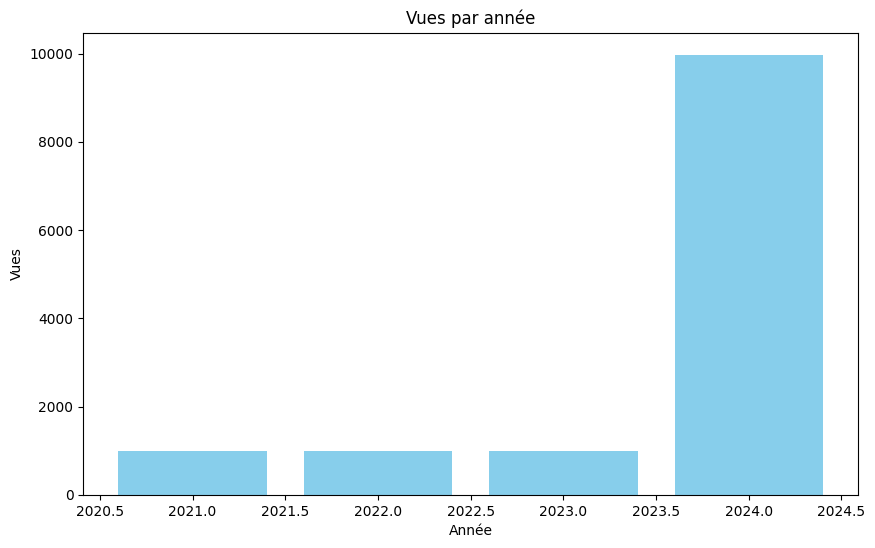

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Créer un graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(years, views, color='skyblue')

# Ajouter les labels et le titre
plt.xlabel('Année')
plt.ylabel('Vues')
plt.title('Vues par année')

# Afficher le graphique
plt.show()


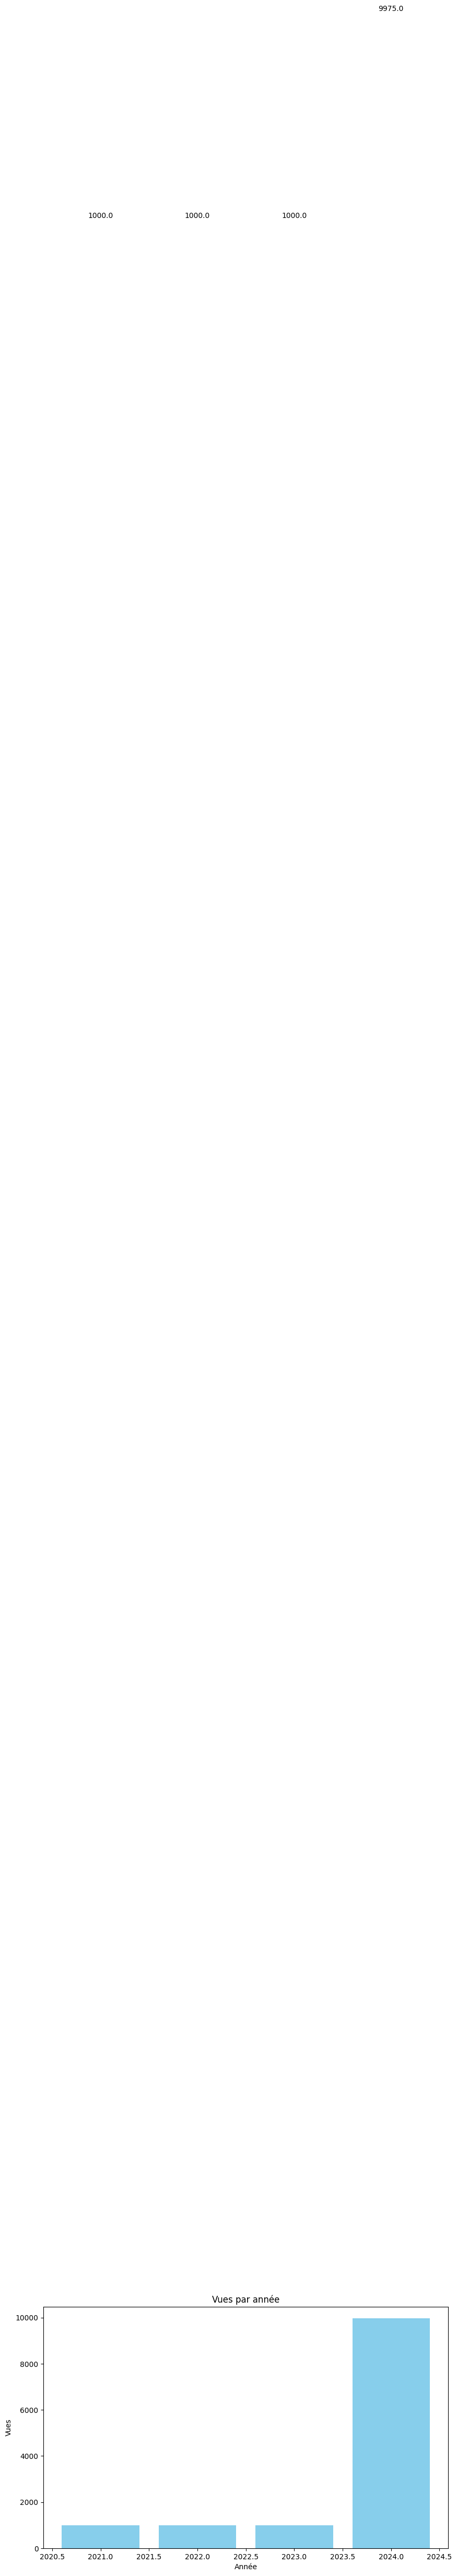

In [167]:
# Personnalisation du graphique
plt.figure(figsize=(10, 6))
bars = plt.bar(years, views, color='skyblue')

# Ajouter des étiquettes sur les barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 100000, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Ajouter les labels et le titre
plt.xlabel('Année')
plt.ylabel('Vues')
plt.title('Vues par année')

# Afficher le graphique
plt.show()


In [168]:

try:
    # Établir la connexion
    conn = adodbapi.connect(connection_string)
    print("Connected to SSAS successfully!")

    # Exemple de requête MDX
    cursor = conn.cursor()
    mdx_query = """
    SELECT 
        [Measures].[Normalized Salary] ON COLUMNS, 
        [Location 1].[hierarchies loc].[Country Job] ON ROWS 
    FROM [DW 1]
    """
    cursor.execute(mdx_query)

    # Parcourir les résultats
    results = cursor.fetchall()

    # Transformer les résultats en DataFrame pandas
    data = pd.DataFrame(results, columns=["Country", "Salary"])
    print(data.head())  # Aperçu des données
    cursor.close()
   
except Exception as e:
    print(f"Failed to connect or execute query: {e}")


Connected to SSAS successfully!
                   Country        Salary
0                   Abbott  6.383508e+07
1  Aberdeen Proving Ground  8.261374e+07
2     Acadia Parish County  1.040000e+05
3                  Accomac  1.411381e+07
4               Ada County  6.395601e+07


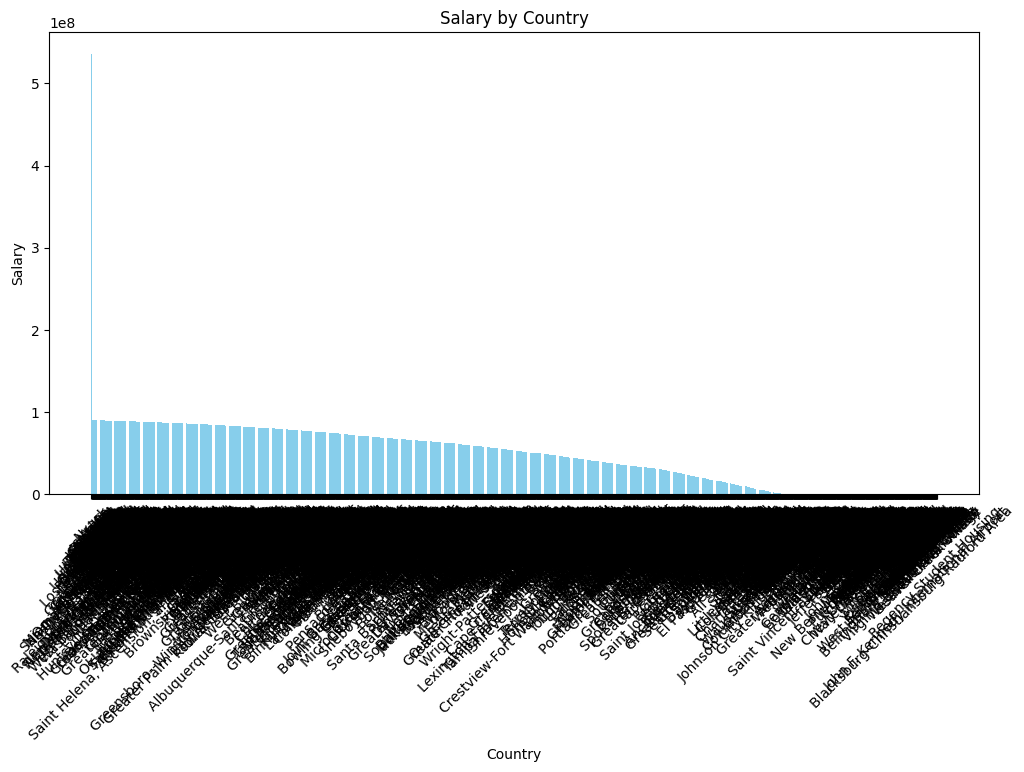

C:\Users\pc\AppData\Local\Temp\ipykernel_22036\3184879667.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="Salary", data=data, palette="viridis")


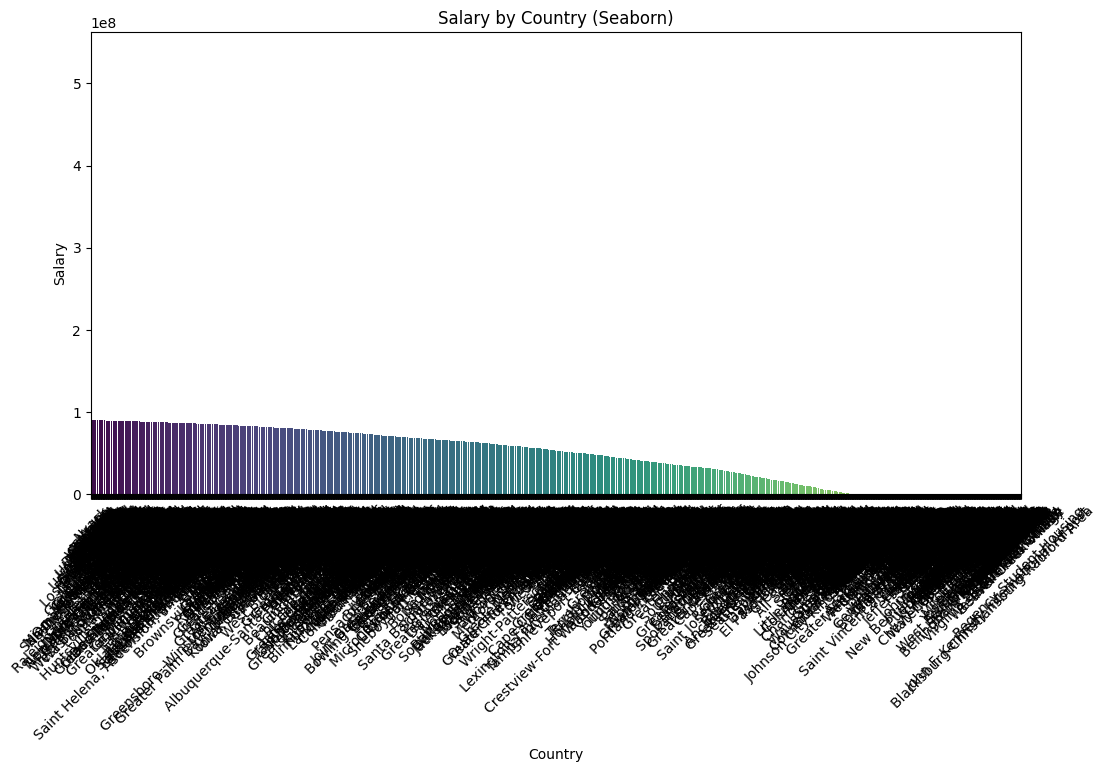

In [169]:

plt.figure(figsize=(12, 6))
data.sort_values("Salary", ascending=False, inplace=True)
plt.bar(data["Country"], data["Salary"], color="skyblue")
plt.title("Salary by Country")
plt.xlabel("Country")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Country", y="Salary", data=data, palette="viridis")
plt.title("Salary by Country (Seaborn)")
plt.xticks(rotation=45)
plt.show()

fig = px.bar(data, x="Country", y="Salary", title="Salary by Country (Interactive)")
fig.show()

# evolution du temps pqr rqpport la date 

In [170]:
try:
    # Établir la connexion
    conn = adodbapi.connect(connection_string)
    print("Connected to SSAS successfully!")

    # Requête MDX
    mdx_query = """
    SELECT 
        [Measures].[Normalized Salary] ON COLUMNS, 
        [Temps 1].[temps].[Annees].MEMBERS ON ROWS
    FROM [DW 1]
    """

    # Exécuter la requête
    cursor = conn.cursor()
    cursor.execute(mdx_query)

    # Extraire les colonnes et les résultats
    columns = [desc[0] for desc in cursor.description]
    results = cursor.fetchall()

    # Transformer en DataFrame pandas
    df = pd.DataFrame(results, columns=columns)

    # Fermer la connexion
    cursor.close()

    # Analyser les données
    df["[Temps 1].[temps].[Annees].[MEMBER_CAPTION]"] = pd.to_datetime(
        df["[Temps 1].[temps].[Annees].[MEMBER_CAPTION]"], 
        errors="coerce",  # Remplacer les erreurs par NaT (Not a Time)
        format="%Y"
    )
    df["[Temps 1].[temps].[Annees].[MEMBER_CAPTION]"] = pd.to_datetime(df["[Temps 1].[temps].[Annees].[MEMBER_CAPTION]"], format="%Y")  # Assurez-vous du bon format des années
    df.sort_values("[Temps 1].[temps].[Annees].[MEMBER_CAPTION]", inplace=True)  # Trier par années

    print("Données analysées :")
    print(df)



except Exception as e:
    print(f"Failed to connect or execute query: {e}")


Connected to SSAS successfully!
Données analysées :
  [Temps 1].[temps].[Annees].[MEMBER_CAPTION]  [Measures].[Normalized Salary]
0                                  2021-01-01                         97500.0
1                                  2022-01-01                         97500.0
2                                  2023-01-01                         97500.0
3                                  2024-01-01                     535600000.0
4                                         NaT                             NaN


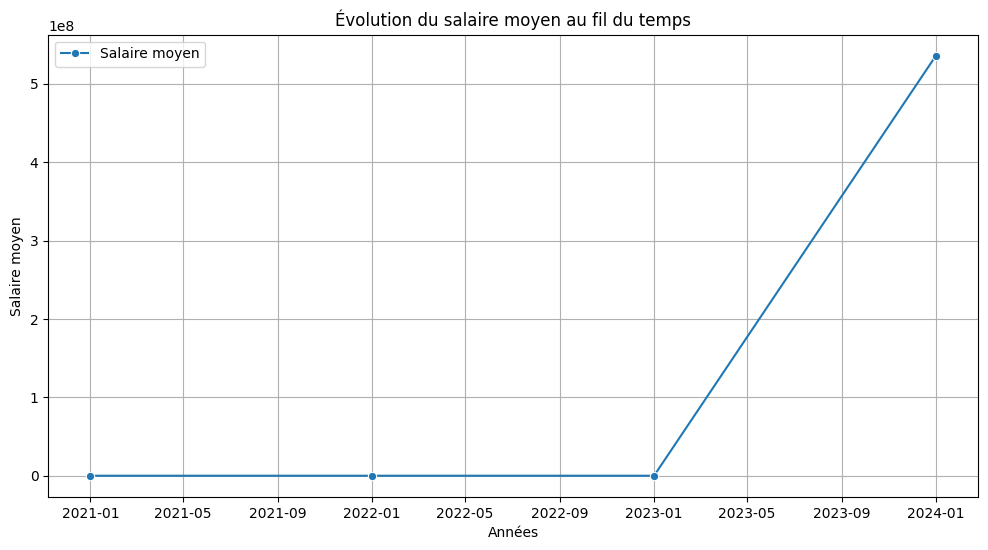

In [171]:
    # Visualisation
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="[Temps 1].[temps].[Annees].[MEMBER_CAPTION]", y="[Measures].[Normalized Salary]", marker="o", label="Salaire moyen")
plt.title("Évolution du salaire moyen au fil du temps")
plt.xlabel("Années")
plt.ylabel("Salaire moyen")
plt.grid()
plt.legend()
plt.show()

# Les offres d'emploi sont-elles plus populaires à certains moments de l'année ?

In [172]:
try:
    # Établir la connexion
    conn = adodbapi.connect(connection_string)
    print("Connected to SSAS successfully!")

    # Requête MDX pour analyser le nombre d'offres d'emploi par mois ou par année
    mdx_query = """
    SELECT 
        [Measures].[Views] ON COLUMNS, 
        [Temps 1].[temps].[Annees].MEMBERS ON ROWS 
    FROM [DW 1]
    """

    # Exécuter la requête
    cursor = conn.cursor()
    cursor.execute(mdx_query)

    # Extraire les colonnes et les résultats
    columns = [desc[0] for desc in cursor.description]
    results = cursor.fetchall()

    # Transformer en DataFrame pandas
    df = pd.DataFrame(results, columns=columns)

    # Fermer la connexion
    cursor.close()

    

except Exception as e:
    print(f"Failed to connect or execute query: {e}")

Connected to SSAS successfully!


In [173]:
# Analyser les données
df["[Measures].[Views]"] = pd.to_numeric(df["[Measures].[Views]"], errors="coerce")  # Convertir en numérique
df["[Temps 1].[temps].[Annees].[MEMBER_CAPTION]"] = pd.to_datetime(df["[Temps 1].[temps].[Annees].[MEMBER_CAPTION]"],errors="coerce", format="%Y")  # Format pour les mois
df.sort_values("[Temps 1].[temps].[Annees].[MEMBER_CAPTION]", inplace=True)  # Trier par mois ou année

print("Données analysées :")
print(df)

Données analysées :
  [Temps 1].[temps].[Annees].[MEMBER_CAPTION]  [Measures].[Views]
0                                  2021-01-01              1000.0
1                                  2022-01-01              1000.0
2                                  2023-01-01              1000.0
3                                  2024-01-01              9975.0
4                                         NaT                 NaN


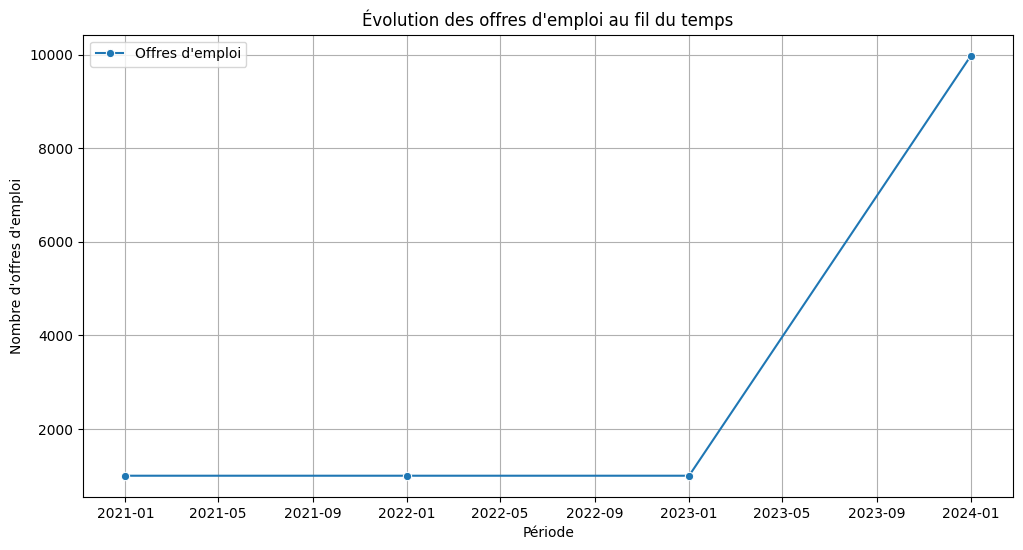

In [174]:
# Visualisation
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="[Temps 1].[temps].[Annees].[MEMBER_CAPTION]", y="[Measures].[Views]", marker="o", label="Offres d'emploi")
plt.title("Évolution des offres d'emploi au fil du temps")
plt.xlabel("Période")
plt.ylabel("Nombre d'offres d'emploi")
plt.grid()
plt.legend()
plt.show()